# *Assignment: `Credit EDA Case Study` by `Anmol Mehta`*

### Introduction
This case study aims to give us an idea of applying EDA in a real business scenario. In this case study, we develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.
### Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

## Importing Standard & Important Libraries
### Setting pandas' display options & disabling warnings

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.options.display.float_format = '{:,.2f}'.format
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Loading
### Importing Application Data, Previous Application Data & Data Dictionary

In [4]:
app_data = pd.read_csv(r'C:\Users\anmol\Downloads\application_data.csv')
prev_app = pd.read_csv(r'C:\Users\anmol\Downloads\previous_application.csv')
col_desc = pd.read_csv(r'C:\Users\anmol\Downloads\columns_description.csv',encoding= 'unicode_escape')

This dataset has 3 files as explained below: 
1. #### *'application_data.csv'*   
contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.
2. #### *'previous_application.csv'* 
contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.
3. #### *'columns_description.csv'* 
is data dictionary which describes the meaning of the variables.

### Checking dimensions of the data

In [24]:
print(app_data.shape)
print(prev_app.shape)
print(col_desc.shape)

(307511, 122)
(1670214, 37)
(160, 5)


### Data Quality & Inspection Checks

In [33]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0               Y             0        202,500.00   406,597.50    24,700.50   
1               N             0        270,000.00 1,293,502.50    35,698.50   
2               Y             0         67,500.00   135,000.00     6,750.00   
3               Y             0        135,000.00   312,682.50    29,686.50   
4               Y             0        121,500.00   513,000.00    21,865.50   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0       351,000.00   Unaccompanied          Working   
1     1,129,500.00          Family    State servant   
2       135,000.00   Unaccompanied          Working   
3       297,000.00   Unaccompanied          Working   
4       513,000.00   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                        0.02       -9461           -637          -3,648.00   
1                        0.00      -16765          -1188          -1,186.00   
2                        0.01      -19046           -225          -4,260.00   
3                        0.01      -19005          -3039          -9,833.00   
4                        0.03      -19932          -3038          -4,311.00   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          nan           1               1                0   
1             -291          nan           1               1                0   
2            -2531        26.00           1               1                1   
3            -2437          nan           1               1                0   
4            -3458          nan           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers             1.00   
1                 1           1           0      Core staff             2.00   
2                 1           1           0        Laborers             1.00   
3                 1           0           0        Laborers             2.00   
4                 1           0           0      Core staff             1.00   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                  

In [28]:
app_data.describe()

SK_ID_CURR     TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  \
count  307,511.00 307,511.00    307,511.00        307,511.00   307,511.00   
mean   278,180.52       0.08          0.42        168,797.92   599,026.00   
std    102,790.18       0.27          0.72        237,123.15   402,490.78   
min    100,002.00       0.00          0.00         25,650.00    45,000.00   
25%    189,145.50       0.00          0.00        112,500.00   270,000.00   
50%    278,202.00       0.00          0.00        147,150.00   513,531.00   
75%    367,142.50       0.00          1.00        202,500.00   808,650.00   
max    456,255.00       1.00         19.00    117,000,000.00 4,050,000.00   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count   307,499.00       307,233.00                  307,511.00  307,511.00   
mean     27,108.57       538,396.21                        0.02  -16,037.00   
std      14,493.74       369,446.46                        0.01    4,363.99   
min       1,615.50        40,500.00                        0.00  -25,229.00   
25%      16,524.00       238,500.00                        0.01  -19,682.00   
50%      24,903.00       450,000.00                        0.02  -15,750.00   
75%      34,596.00       679,500.00                        0.03  -12,413.00   
max     258,025.50     4,050,000.00                        0.07   -7,489.00   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
count     307,511.00         307,511.00       307,511.00   104,582.00   
mean       63,815.05          -4,986.12        -2,994.20        12.06   
std       141,275.77           3,522.89         1,509.45        11.94   
min       -17,912.00         -24,672.00        -7,197.00         0.00   
25%        -2,760.00          -7,479.50        -4,299.00         5.00   
50%        -1,213.00          -4,504.00        -3,254.00         9.00   
75%          -289.00          -2,010.00        -1,720.00        15.00   
max       365,243.00               0.00             0.00        91.00   

       FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count  307,511.00      307,511.00       307,511.00        307,511.00   
mean         1.00            0.82             0.20              1.00   
std          0.00            0.38             0.40              0.04   
min          0.00            0.00             0.00              0.00   
25%          1.00            1.00             0.00              1.00   
50%          1.00            1.00             0.00              1.00   
75%          1.00            1.00             0.00              1.00   
max          1.00            1.00             1.00              1.00   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307,511.00  307,511.00       307,509.00            307,511.00   
mean         0.28        0.06             2.15                  2.05   
std          0.45        0.23             0.91                  0.51   
min          0.00        0.00             1.00                  1.00   
25%          0.00        0.00             2.00                  2.00   
50%          0.00        0.00             2.00                  2.00   
75%          1.00        0.00             3.00                  2.00   
max          1.00        1.00            20.00                  3.00   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                   307,511.00               307,511.00   
mean                          2.03                    12.06   
std                           0.50                     3.27   
min                           1.00                     0.00   
25%                           2.00                    10.00   
50%                           2.00                    12.00   
75%                           2.00                    14.00   
max                           3.00                    23.00   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count       

In [34]:
prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1,730.43        17,145.00   
1     2802425      108129         Cash loans    25,188.62       607,500.00   
2     2523466      122040         Cash loans    15,060.74       112,500.00   
3     2819243      176158         Cash loans    47,041.33       450,000.00   
4     1784265      202054         Cash loans    31,924.40       337,500.00   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0   17,145.00              0.00        17,145.00                   SATURDAY   
1  679,671.00               nan       607,500.00                   THURSDAY   
2  136,444.50               nan       112,500.00                    TUESDAY   
3  470,790.00               nan       450,000.00                     MONDAY   
4  404,055.00               nan       337,500.00                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1               0.00                   0.18   
1                       1                nan                    nan   
2                       1                nan                    nan   
3                       1                nan                    nan   
4                       1                nan                    nan   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                      0.87                    XAP             Approved   
1                       nan                    XNA             Approved   
2                       nan                    XNA             Approved   
3                       nan                    XNA             Approved   
4                       nan                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0        12.00           middle  POS mobile with interest          365,243.00   
1        36.00       low_action          Cash X-Sell: low          365,243.00   
2        12.00             high         Cash X-Sell: high          365,243.00   
3        12.00           middle       Cash X-Sell: middle          365,243.00   
4        24.00             high         Cash Street: high                 nan   

   D

In [30]:
prev_app.describe()

SK_ID_PREV   SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION   AMT_CREDIT  \
count 1,670,214.00 1,670,214.00 1,297,979.00     1,670,214.00 1,670,213.00   
mean  1,923,089.14   278,357.17    15,955.12       175,233.86   196,114.02   
std     532,597.96   102,814.82    14,782.14       292,779.76   318,574.62   
min   1,000,001.00   100,001.00         0.00             0.00         0.00   
25%   1,461,857.25   189,329.00     6,321.78        18,720.00    24,160.50   
50%   1,923,110.50   278,714.50    11,250.00        71,046.00    80,541.00   
75%   2,384,279.75   367,514.00    20,658.42       180,360.00   216,418.50   
max   2,845,382.00   456,255.00   418,058.15     6,905,160.00 6,905,160.00   

       AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count        774,370.00     1,284,699.00             1,670,214.00   
mean           6,697.40       227,847.28                    12.48   
std           20,921.50       315,396.56                     3.33   
min               -0.90             0.00                     0.00   
25%                0.00        50,841.00                    10.00   
50%            1,638.00       112,320.00                    12.00   
75%            7,740.00       234,000.00                    15.00   
max        3,060,045.00     6,905,160.00                    23.00   

       NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
count            1,670,214.00         774,370.00               5,951.00   
mean                     1.00               0.08                   0.19   
std                      0.06               0.11                   0.09   
min                      0.00              -0.00                   0.03   
25%                      1.00               0.00                   0.16   
50%                      1.00               0.05                   0.19   
75%                      1.00               0.11                   0.19   
max                      1.00               1.00                   1.00   

       RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  \
count                  5,951.00   1,670,214.00      1,670,214.00 1,297,984.00   
mean                       0.77        -880.68            313.95        16.05   
std                        0.10         779.10          7,127.44        14.57   
min                        0.37      -2,922.00             -1.00         0.00   
25%                        0.72      -1,300.00             -1.00         6.00   
50%                        0.84        -581.00              3.00        12.00   
75%                        0.85        -280.00             82.00        24.00   
max                        1.00          -1.00      4,000,000.00        84.00   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count          997,149.00      997,149.00                 997,149.00   
mean           342,209.86       13,826.27                  33,767.77   
std             88,916.12       72,444.87                 106,857.03   
min             -2,922.00       -2,892.00                  -2,801.00   
25%            365,243.00       -1,628.00                  -1,242.00   
50%            365,243.00         -831.00                    -361.00   
75%            365,243.00         -411.00                     129.00   
max            365,243.00      365,243.00                 365,243.00   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count     997,149.00        997,149.00                 997,149.00  
mean       76,582.40         81,992.34                       0.33  
std       149,647.42        153,303.52                       0.47  
min        -2,889.00         -2,874.00                       0.00  
25%        -1,314.00         -1,270.00                       0.00  
50%          -537.00           -499.00                       0.00  
75%           -74.00            -44.00                       1.00  
max       365,243.00        365,243.00                       1.00

In [35]:
col_desc[['Table','Row','Description','Special']].head()

Table                 Row  \
0  application_data          SK_ID_CURR   
1  application_data              TARGET   
2  application_data  NAME_CONTRACT_TYPE   
3  application_data         CODE_GENDER   
4  application_data        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN

## Checking Percentage of Missing Values in all the columns

In [5]:
null_p = app_data.isnull().sum()/len(app_data)*100

In [40]:
null_p.sort_values(ascending=False)

COMMONAREA_MEDI                69.87
COMMONAREA_AVG                 69.87
COMMONAREA_MODE                69.87
NONLIVINGAPARTMENTS_MODE       69.43
NONLIVINGAPARTMENTS_MEDI       69.43
NONLIVINGAPARTMENTS_AVG        69.43
FONDKAPREMONT_MODE             68.39
LIVINGAPARTMENTS_MEDI          68.35
LIVINGAPARTMENTS_MODE          68.35
LIVINGAPARTMENTS_AVG           68.35
FLOORSMIN_MEDI                 67.85
FLOORSMIN_MODE                 67.85
FLOORSMIN_AVG                  67.85
YEARS_BUILD_MEDI               66.50
YEARS_BUILD_AVG                66.50
YEARS_BUILD_MODE               66.50
OWN_CAR_AGE                    65.99
LANDAREA_MODE                  59.38
LANDAREA_AVG                   59.38
LANDAREA_MEDI                  59.38
BASEMENTAREA_MEDI              58.52
BASEMENTAREA_AVG               58.52
BASEMENTAREA_MODE              58.52
EXT_SOURCE_1                   56.38
NONLIVINGAREA_MEDI             55.18
NONLIVINGAREA_AVG              55.18
NONLIVINGAREA_MODE             55.18
E

### After assessing the above data, it seems like most of the columns with Null percentage > 50% do not hold much importance with respect to our current Problem Statement.

## Cleaning the Data

### Checking columns with more than 50% null values and dropping them

In [6]:
#list of columns to delete
appdel = list(null_p[null_p.values>50].index)

#dropping above columns and creating a new Dataframe
app_data_new = app_data.drop(appdel, axis=1)

print("Number of Dropped columns: "+str(len(appdel)))

Number of Dropped columns: 41


### Checking Column Definitions to drop irrelevant columns for optimized processing

In [43]:
col_desc[['Table','Row','Description','Special']]

Table                           Row  \
0            application_data                    SK_ID_CURR   
1            application_data                        TARGET   
2            application_data            NAME_CONTRACT_TYPE   
3            application_data                   CODE_GENDER   
4            application_data                  FLAG_OWN_CAR   
5            application_data               FLAG_OWN_REALTY   
6            application_data                  CNT_CHILDREN   
7            application_data              AMT_INCOME_TOTAL   
8            application_data                    AMT_CREDIT   
9            application_data                   AMT_ANNUITY   
10           application_data               AMT_GOODS_PRICE   
11           application_data               NAME_TYPE_SUITE   
12           application_data              NAME_INCOME_TYPE   
13           application_data           NAME_EDUCATION_TYPE   
14           application_data            NAME_FAMILY_STATUS   
15           application_data             NAME_HOUSING_TYPE   
16           application_data    REGION_POPULATION_RELATIVE   
17           application_data                    DAYS_BIRTH   
18           application_data                 DAYS_EMPLOYED   
19           application_data             DAYS_REGISTRATION   
20           application_data               DAYS_ID_PUBLISH   
21           application_data                   OWN_CAR_AGE   
22           application_data                    FLAG_MOBIL   
23           application_data                FLAG_EMP_PHONE   
24           application_data               FLAG_WORK_PHONE   
25           application_data              FLAG_CONT_MOBILE   
26           application_data                    FLAG_PHONE   
27           application_data                    FLAG_EMAIL   
28           application_data               OCCUPATION_TYPE   
29           application_data               CNT_FAM_MEMBERS   
30           application_data          REGION_RATING_CLIENT   
31           application_data   REGION_RATING_CLIENT_W_CITY   
32           application_data    WEEKDAY_APPR_PROCESS_START   
33           application_data       HOUR_APPR_PROCESS_START   
34           application_data    REG_REGION_NOT_LIVE_REGION   
35           application_data    REG_REGION_NOT_WORK_REGION   
36           application_data   LIVE_REGION_NOT_WORK_REGION   
37           application_data        REG_CITY_NOT_LIVE_CITY   
38           application_data        REG_CITY_NOT_WORK_CITY   
39           application_data       LIVE_CITY_NOT_WORK_CITY   
40           application_data             ORGANIZATION_TYPE   
41           application_data                  EXT_SOURCE_1   
42           application_data                  EXT_SOURCE_2   
43           application_data                  EXT_SOURCE_3   
44           application_data                APARTMENTS_AVG   
45           application_data              BASEMENTAREA_AVG   
46           application_data   YEARS_BEGINEXPLUATATION_AVG   
47           application_data               YEARS_BUILD_AVG   
48           application_data                COMMONAREA_AVG   
49           application_data                 ELEVATORS_AVG   
50           application_data                 ENTRANCES_AVG   
51           application_data                 FLOORSMAX_AVG   
52           application_data                 FLOORSMIN_AVG   
53           application_data                  LANDAREA_AVG   
54           application_data          LIVINGAPARTMENTS_AVG   
55           application_data                LIVINGAREA_AVG   
56           application_data       NONLIVINGAPARTMENTS_AVG   
57           application_data             NONLIVINGAREA_AVG   
58           application_data               APARTMENTS_MODE   
59           application_data             BASEMENTAREA_MODE   
60           application_data  YEARS_BEGINEXPLUATATION_MODE   
61           application_data              YEARS_BUILD_MODE   
62           application_data               COMMONAREA_

#### Columns like 'Ext_source' & 'Flag_document' do not hold much analytical importance or significance
#### Removing those columns

In [7]:
col_list=list(app_data_new.columns)

del_col = [col for col in col_list if col.startswith("FLAG_DOCUMENT") or col.startswith("EXT_SOURCE")]

app_data_cl = app_data_new.drop(del_col, axis=1)

app_data_cl.shape

(307511, 59)

#### Dropping duplicates (If any)

In [8]:
app_data_cl.drop_duplicates(subset=None, inplace=True)
app_data_cl.shape

(307511, 59)

#### No change in shape means there were no duplicates in the application dataset

### Checking data types for the dataset

In [47]:
app_data_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 59 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

#### Changing the datatypes of columns to be used for analysis & consistency for Computation

In [9]:
num_cols=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

app_data_cl[num_cols]=app_data_cl[num_cols].apply(pd.to_numeric)
app_data_cl.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0               Y             0        202,500.00   406,597.50    24,700.50   
1               N             0        270,000.00 1,293,502.50    35,698.50   
2               Y             0         67,500.00   135,000.00     6,750.00   
3               Y             0        135,000.00   312,682.50    29,686.50   
4               Y             0        121,500.00   513,000.00    21,865.50   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0       351,000.00   Unaccompanied          Working   
1     1,129,500.00          Family    State servant   
2       135,000.00   Unaccompanied          Working   
3       297,000.00   Unaccompanied          Working   
4       513,000.00   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                        0.02       -9461           -637          -3,648.00   
1                        0.00      -16765          -1188          -1,186.00   
2                        0.01      -19046           -225          -4,260.00   
3                        0.01      -19005          -3039          -9,833.00   
4                        0.03      -19932          -3038          -4,311.00   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers             1.00   
1                 1           1           0      Core staff             2.00   
2                 1           1           0        Laborers             1.00   
3                 1           0           0        Laborers             2.00   
4                 1           0           0      Core staff             1.00   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0       

### Missing Values - Imputation Analysis
#### Check in data if missing values for some columns can be imputed in the cleansed Dataset
#### Checking in "null_p" dataset for columns with more than ~13.5% & relevant for analysis as well

In [49]:
col_inp = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY",
"AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_QRT","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE",
"DEF_60_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE"]

app_data_cl[col_inp].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_MON  \
count                  265,992.00                 265,992.00   
mean                         1.90                       0.27   
std                          1.87                       0.92   
min                          0.00                       0.00   
25%                          0.00                       0.00   
50%                          1.00                       0.00   
75%                          3.00                       0.00   
max                         25.00                      27.00   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_DAY  \
count                  265,992.00                 265,992.00   
mean                         0.03                       0.01   
std                          0.20                       0.11   
min                          0.00                       0.00   
25%                          0.00                       0.00   
50%                          0.00                       0.00   
75%                          0.00                       0.00   
max                          8.00                       9.00   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_QRT  \
count                  265,992.00                 265,992.00   
mean                         0.01                       0.27   
std                          0.08                       0.79   
min                          0.00                       0.00   
25%                          0.00                       0.00   
50%                          0.00                       0.00   
75%                          0.00                       0.00   
max                          4.00                     261.00   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count                306,490.00                306,490.00   
mean                       0.14                      1.41   
std                        0.45                      2.38   
min                        0.00                      0.00   
25%                        0.00                      0.00   
50%                        0.00                      0.00   
75%                        0.00                      2.00   
max                       34.00                    344.00   

       DEF_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  
count                306,490.00                306,490.00  
mean                       0.10                      1.42  
std                        0.36                      2.40  
min                        0.00                      0.00  
25%                        0.00                      0.00  
50%                        0.00                      0.00  
75%                        0.00                      2.00  
max                       24.00                    348.00

#### As per above data, we can impute below columns with 0 because their Median, min & Interquartile values are 0
1. AMT_REQ_CREDIT_BUREAU_MON
2. AMT_REQ_CREDIT_BUREAU_WEEK
3. AMT_REQ_CREDIT_BUREAU_DAY
4. AMT_REQ_CREDIT_BUREAU_HOUR
5. AMT_REQ_CREDIT_BUREAU_QRT
6. DEF_30_CNT_SOCIAL_CIRCLE
7. DEF_60_CNT_SOCIAL_CIRCLE

#### Checking unique values for all the columns

In [50]:
for cols in app_data_cl.columns:
    uval = app_data_cl[cols].unique()
    cdtype = app_data_cl[cols].dtypes
    print('Column \t:{}\nDtype\t:{}\nUnique Val Count\t:{}\nUnique Value Set\t:{}\n\n'.format(cols,cdtype,len(uval),uval))
    

Column 	:SK_ID_CURR
Dtype	:int64
Unique Val Count	:307511
Unique Value Set	:[100002 100003 100004 ... 456253 456254 456255]


Column 	:TARGET
Dtype	:int64
Unique Val Count	:2
Unique Value Set	:[1 0]


Column 	:NAME_CONTRACT_TYPE
Dtype	:object
Unique Val Count	:2
Unique Value Set	:['Cash loans' 'Revolving loans']


Column 	:CODE_GENDER
Dtype	:object
Unique Val Count	:3
Unique Value Set	:['M' 'F' 'XNA']


Column 	:FLAG_OWN_CAR
Dtype	:object
Unique Val Count	:2
Unique Value Set	:['N' 'Y']


Column 	:FLAG_OWN_REALTY
Dtype	:object
Unique Val Count	:2
Unique Value Set	:['Y' 'N']


Column 	:CNT_CHILDREN
Dtype	:int64
Unique Val Count	:15
Unique Value Set	:[ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]


Column 	:AMT_INCOME_TOTAL
Dtype	:float64
Unique Val Count	:2548
Unique Value Set	:[202500.  270000.   67500.  ...  96768.  546250.5 113062.5]


Column 	:AMT_CREDIT
Dtype	:float64
Unique Val Count	:5603
Unique Value Set	:[ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]


Column 


Column 	:TOTALAREA_MODE
Dtype	:float64
Unique Val Count	:5117
Unique Value Set	:[0.0149 0.0714    nan ... 0.489  0.482  0.797 ]


Column 	:EMERGENCYSTATE_MODE
Dtype	:object
Unique Val Count	:3
Unique Value Set	:['No' nan 'Yes']


Column 	:OBS_30_CNT_SOCIAL_CIRCLE
Dtype	:float64
Unique Val Count	:34
Unique Value Set	:[  2.   1.   0.   4.   8.  10.  nan   7.   3.   6.   5.  12.   9.  13.
  11.  14.  22.  16.  15.  17.  20.  25.  19.  18.  21.  24.  23.  28.
  26.  29.  27.  47. 348.  30.]


Column 	:DEF_30_CNT_SOCIAL_CIRCLE
Dtype	:float64
Unique Val Count	:11
Unique Value Set	:[ 2.  0.  1. nan  3.  4.  5.  6.  7. 34.  8.]


Column 	:OBS_60_CNT_SOCIAL_CIRCLE
Dtype	:float64
Unique Val Count	:34
Unique Value Set	:[  2.   1.   0.   4.   8.  10.  nan   7.   3.   6.   5.  12.   9.  13.
  11.  14.  21.  15.  22.  16.  20.  25.  17.  19.  18.  24.  23.  28.
  29.  27.  47. 344.  30.  26.]


Column 	:DEF_60_CNT_SOCIAL_CIRCLE
Dtype	:float64
Unique Val Count	:10
Unique Value Set	:[ 2.  0.  1. nan 

#### Days are in negative range
#### Need to convert them to positive numbers using numpy

In [10]:
app_data_cl[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']] = np.abs(app_data_cl[['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']])

#### Checking Gender records 

In [65]:
app_data_cl.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

#### Imputing XNA (representing 'Not Available') with 'F'

In [11]:
app_data_cl.loc[app_data_cl.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
app_data_cl.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### Checking Organization Types

In [68]:
app_data_cl.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

#### Imputing XNA (representing 'Not Available') with Null

In [12]:
app_data_cl = app_data_cl.replace('XNA',np.NaN)
app_data_cl.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

### Binning Continuous variables into Very Low to Very High Categories basis Quantiles

In [13]:
app_data_cl['AMT_INCOME_RANGE'] = pd.qcut(app_data_cl.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
app_data_cl['AMT_CREDIT_RANGE'] = pd.qcut(app_data_cl.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
# Creating e,ployed year column using days employed
app_data_cl["EMPLOYED_YEAR"]=(app_data_cl["DAYS_EMPLOYED"]//365).astype(int)
#Binning Exp from non exp to highly exp
app_data_cl['CAT_WORK_EXPERIENCE'] = pd.cut(x=app_data_cl["EMPLOYED_YEAR"], bins=[-1, 0, 2, 3, 6, 10, 45], labels=['Not Experinced','Fresher', 'Entry Level', 'Mid Level', 'Senior Level', 'Higher Senior Level'])

#### Setting right format for age by converting 'days_birth' into Years

In [14]:
app_data_cl['DAYS_BIRTH']= (app_data_cl['DAYS_BIRTH']/365).astype(int)
# Binning years from young to old
app_data_cl['DAYS_BIRTH_BINS']=pd.cut(app_data_cl['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])

## Outlier Detection & Treatment

In [13]:
#Numerical Columns
ncols=list(app_data_cl.select_dtypes(exclude=['object','category']))

### Using Box-Plots for Numerical columns

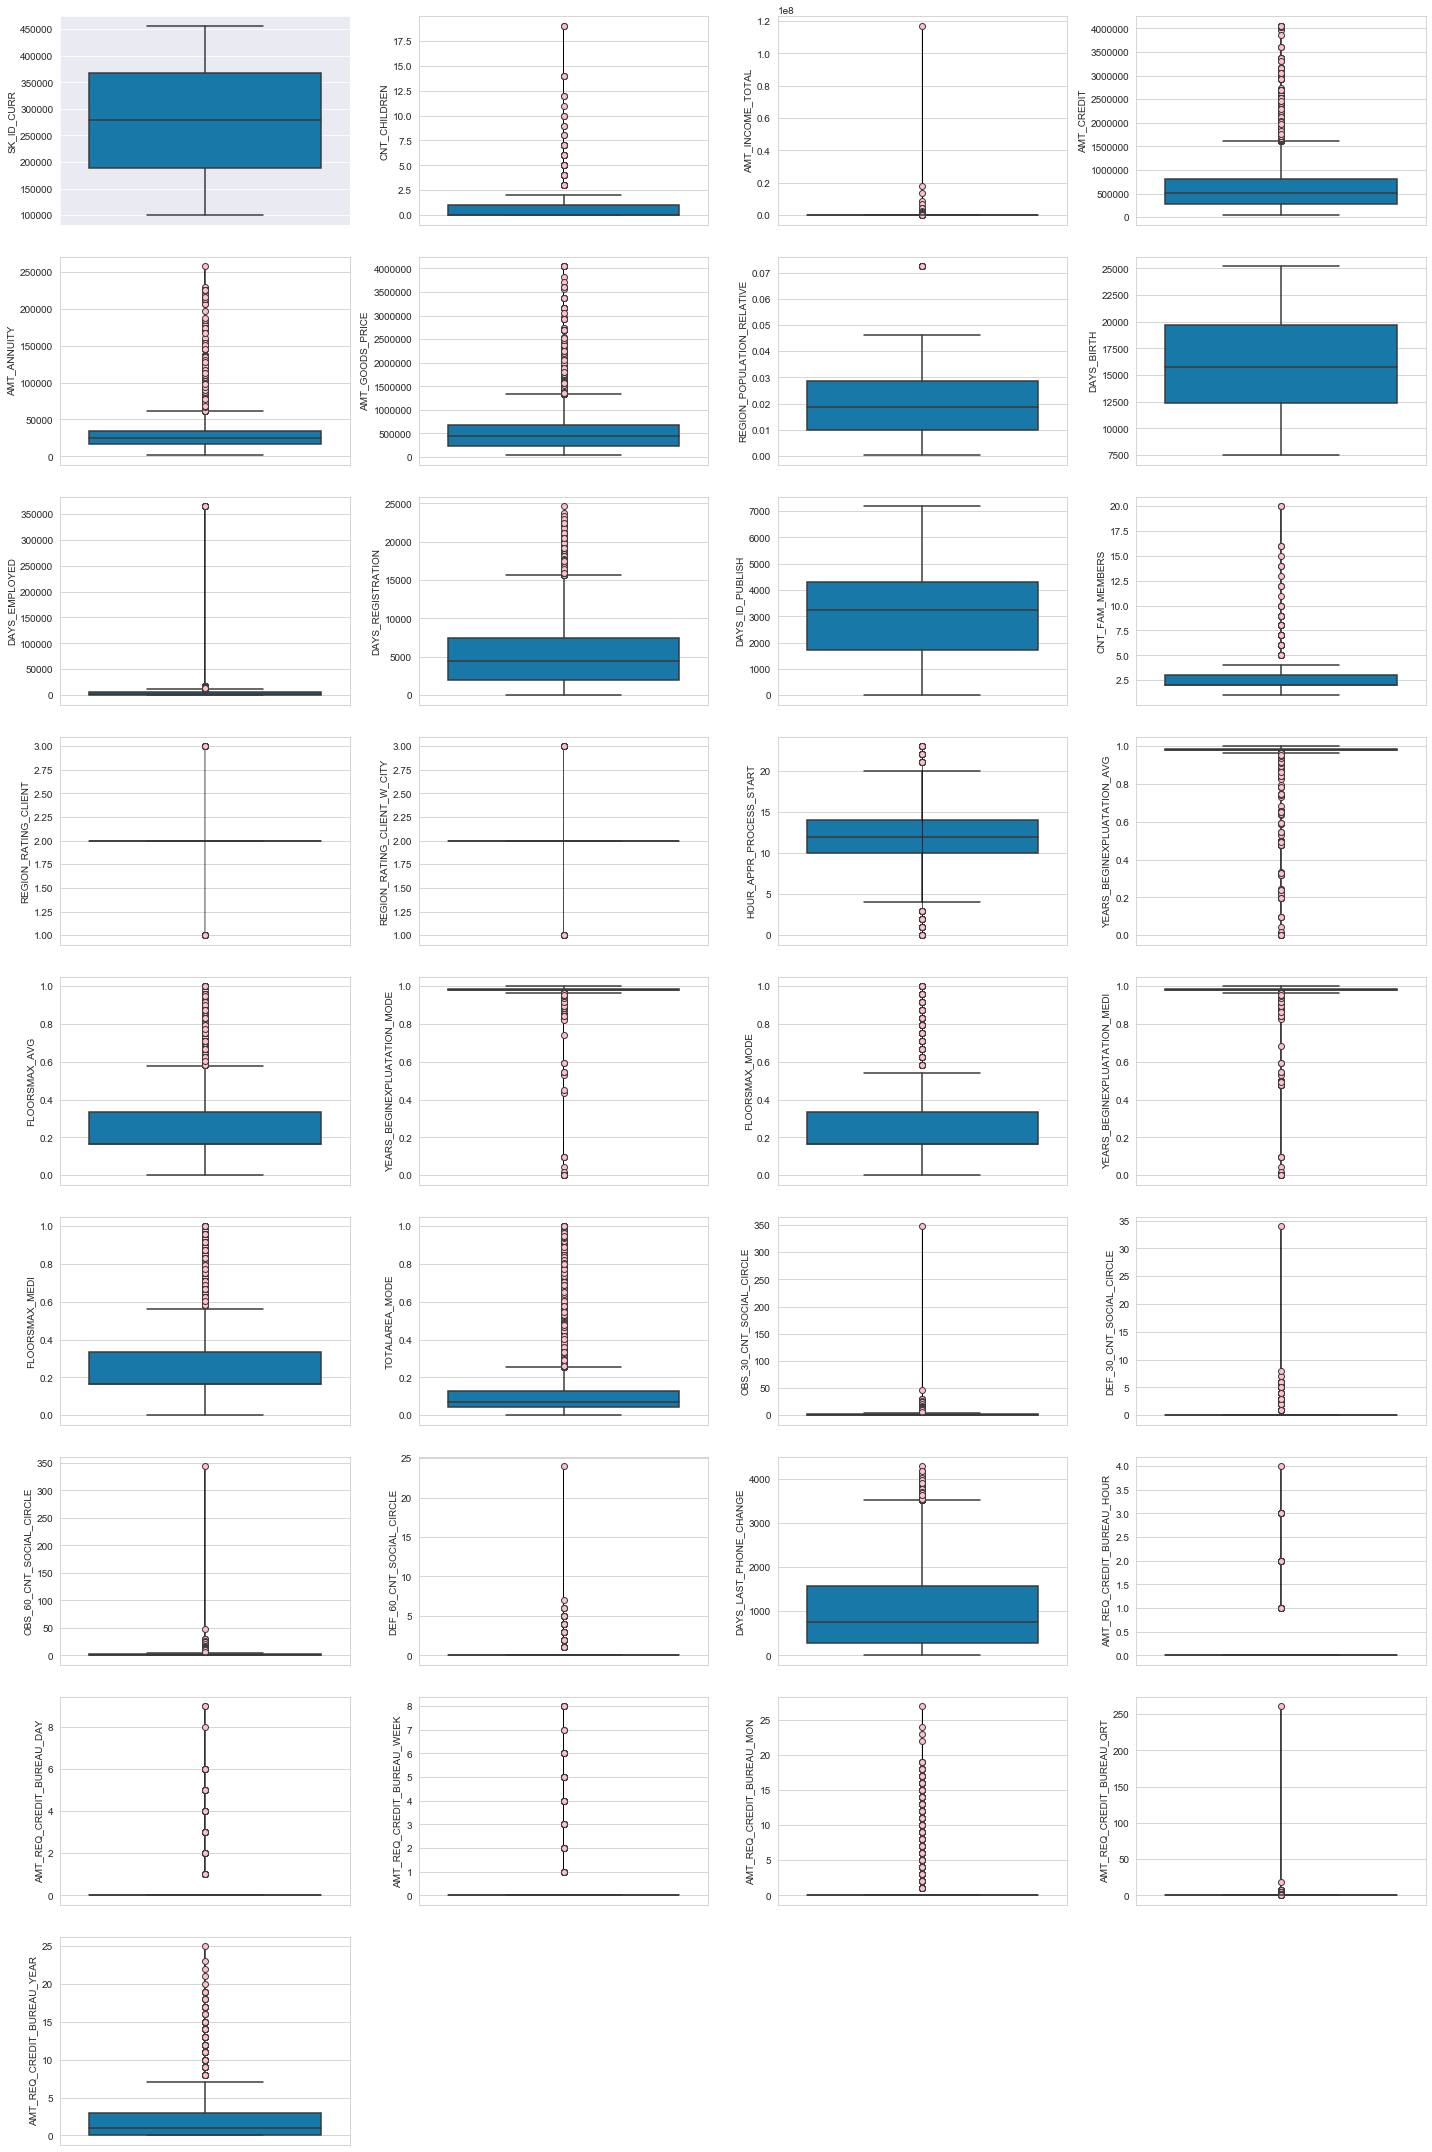

In [60]:
col_len=len(ncols)

# Plotting 4 plots per row for better visuals
sub=(col_len//4)+1
counter=1

plt.figure(1,figsize=(20,40))

# For loop to plot all columns as subplot
for col in ncols:
    if app_data_cl[col].nunique() > 2:
        plt.subplot(sub,4,counter)
        flierprops = dict(marker='o',markerfacecolor='pink', markersize=6,linewidth=0.7,
                      linestyle='-')
        data = app_data_cl[col]
        sns.set_style("whitegrid")
        sns.boxplot(y=data,palette="winter",flierprops=flierprops)
        counter+=1

plt.tight_layout()

plt.show()

#### After assessing & analysing all of the box-plots individually, we can observe prominent outliers for these columns which might hamper the analysis:
AMT_INCOME_TOTAL,AMT_CREDIT,INCOME_CREDIT_RT,LTV_RT,EMPLOYED_YEAR,CNT_FAM_MEMBERS, DEF_30_CNT_SOCIAL_CIRCLE,  AMT_REQ_CREDIT_BUREAU_*, AMT_ANNUITY, DAYS_EMPLOYED, DAYS_REGISTRATION

### Distribution of data in columns with outliers

In [61]:
outliers = ["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","DAYS_EMPLOYED","DAYS_REGISTRATION","CNT_FAM_MEMBERS",
               "DEF_30_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK",
               "AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]

app_data_cl[outliers].describe(percentiles=[.25,.50,.75,.95])

CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
count    307,511.00        307,511.00   307,511.00   307,499.00   
mean           0.42        168,797.92   599,026.00    27,108.57   
std            0.72        237,123.15   402,490.78    14,493.74   
min            0.00         25,650.00    45,000.00     1,615.50   
25%            0.00        112,500.00   270,000.00    16,524.00   
50%            0.00        147,150.00   513,531.00    24,903.00   
75%            1.00        202,500.00   808,650.00    34,596.00   
95%            2.00        337,500.00 1,350,000.00    53,325.00   
max           19.00    117,000,000.00 4,050,000.00   258,025.50   

       AMT_GOODS_PRICE  DAYS_EMPLOYED  DAYS_REGISTRATION  CNT_FAM_MEMBERS  \
count       307,233.00     307,511.00         307,511.00       307,509.00   
mean        538,396.21      67,724.74           4,986.12             2.15   
std         369,446.46     139,443.75           3,522.89             0.91   
min          40,500.00           0.00               0.00             1.00   
25%         238,500.00         933.00           2,010.00             2.00   
50%         450,000.00       2,219.00           4,504.00             2.00   
75%         679,500.00       5,707.00           7,479.50             3.00   
95%       1,305,000.00     365,243.00          11,416.00             4.00   
max       4,050,000.00     365,243.00          24,672.00            20.00   

       DEF_30_CNT_SOCIAL_CIRCLE  AMT_REQ_CREDIT_BUREAU_HOUR  \
count                306,490.00                  265,992.00   
mean                       0.14                        0.01   
std                        0.45                        0.08   
min                        0.00                        0.00   
25%                        0.00                        0.00   
50%                        0.00                        0.00   
75%                        0.00                        0.00   
95%                        1.00                        0.00   
max                       34.00                        4.00   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count                 265,992.00                  265,992.00   
mean                        0.01                        0.03   
std                         0.11                        0.20   
min                         0.00                        0.00   
25%                         0.00                        0.00   
50%                         0.00                        0.00   
75%                         0.00                        0.00   
95%                         0.00                        0.00   
max                         9.00                        8.00   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count                 265,992.00                 265,992.00   
mean                        0.27                       0.27   
std                         0.92                       0.79   
min                         0.00                       0.00   
25%                         0.00                       0.00   
50%                         0.00                       0.00   
75%                         0.00                       0.00   
95%                         1.00                       2.00   
max                        27.00                     261.00   

       AMT_REQ_CREDIT_BUREAU_YEAR  
count                  265,992.00  
mean                         1.90  
std                          1.87  
min                          0.00  
25%                          0.00  
50%                          1.00  
75%                          3.00  
95%                          6.00  
max                         25.00

### Visual Distribution of the Numerical Data (using Histograms)

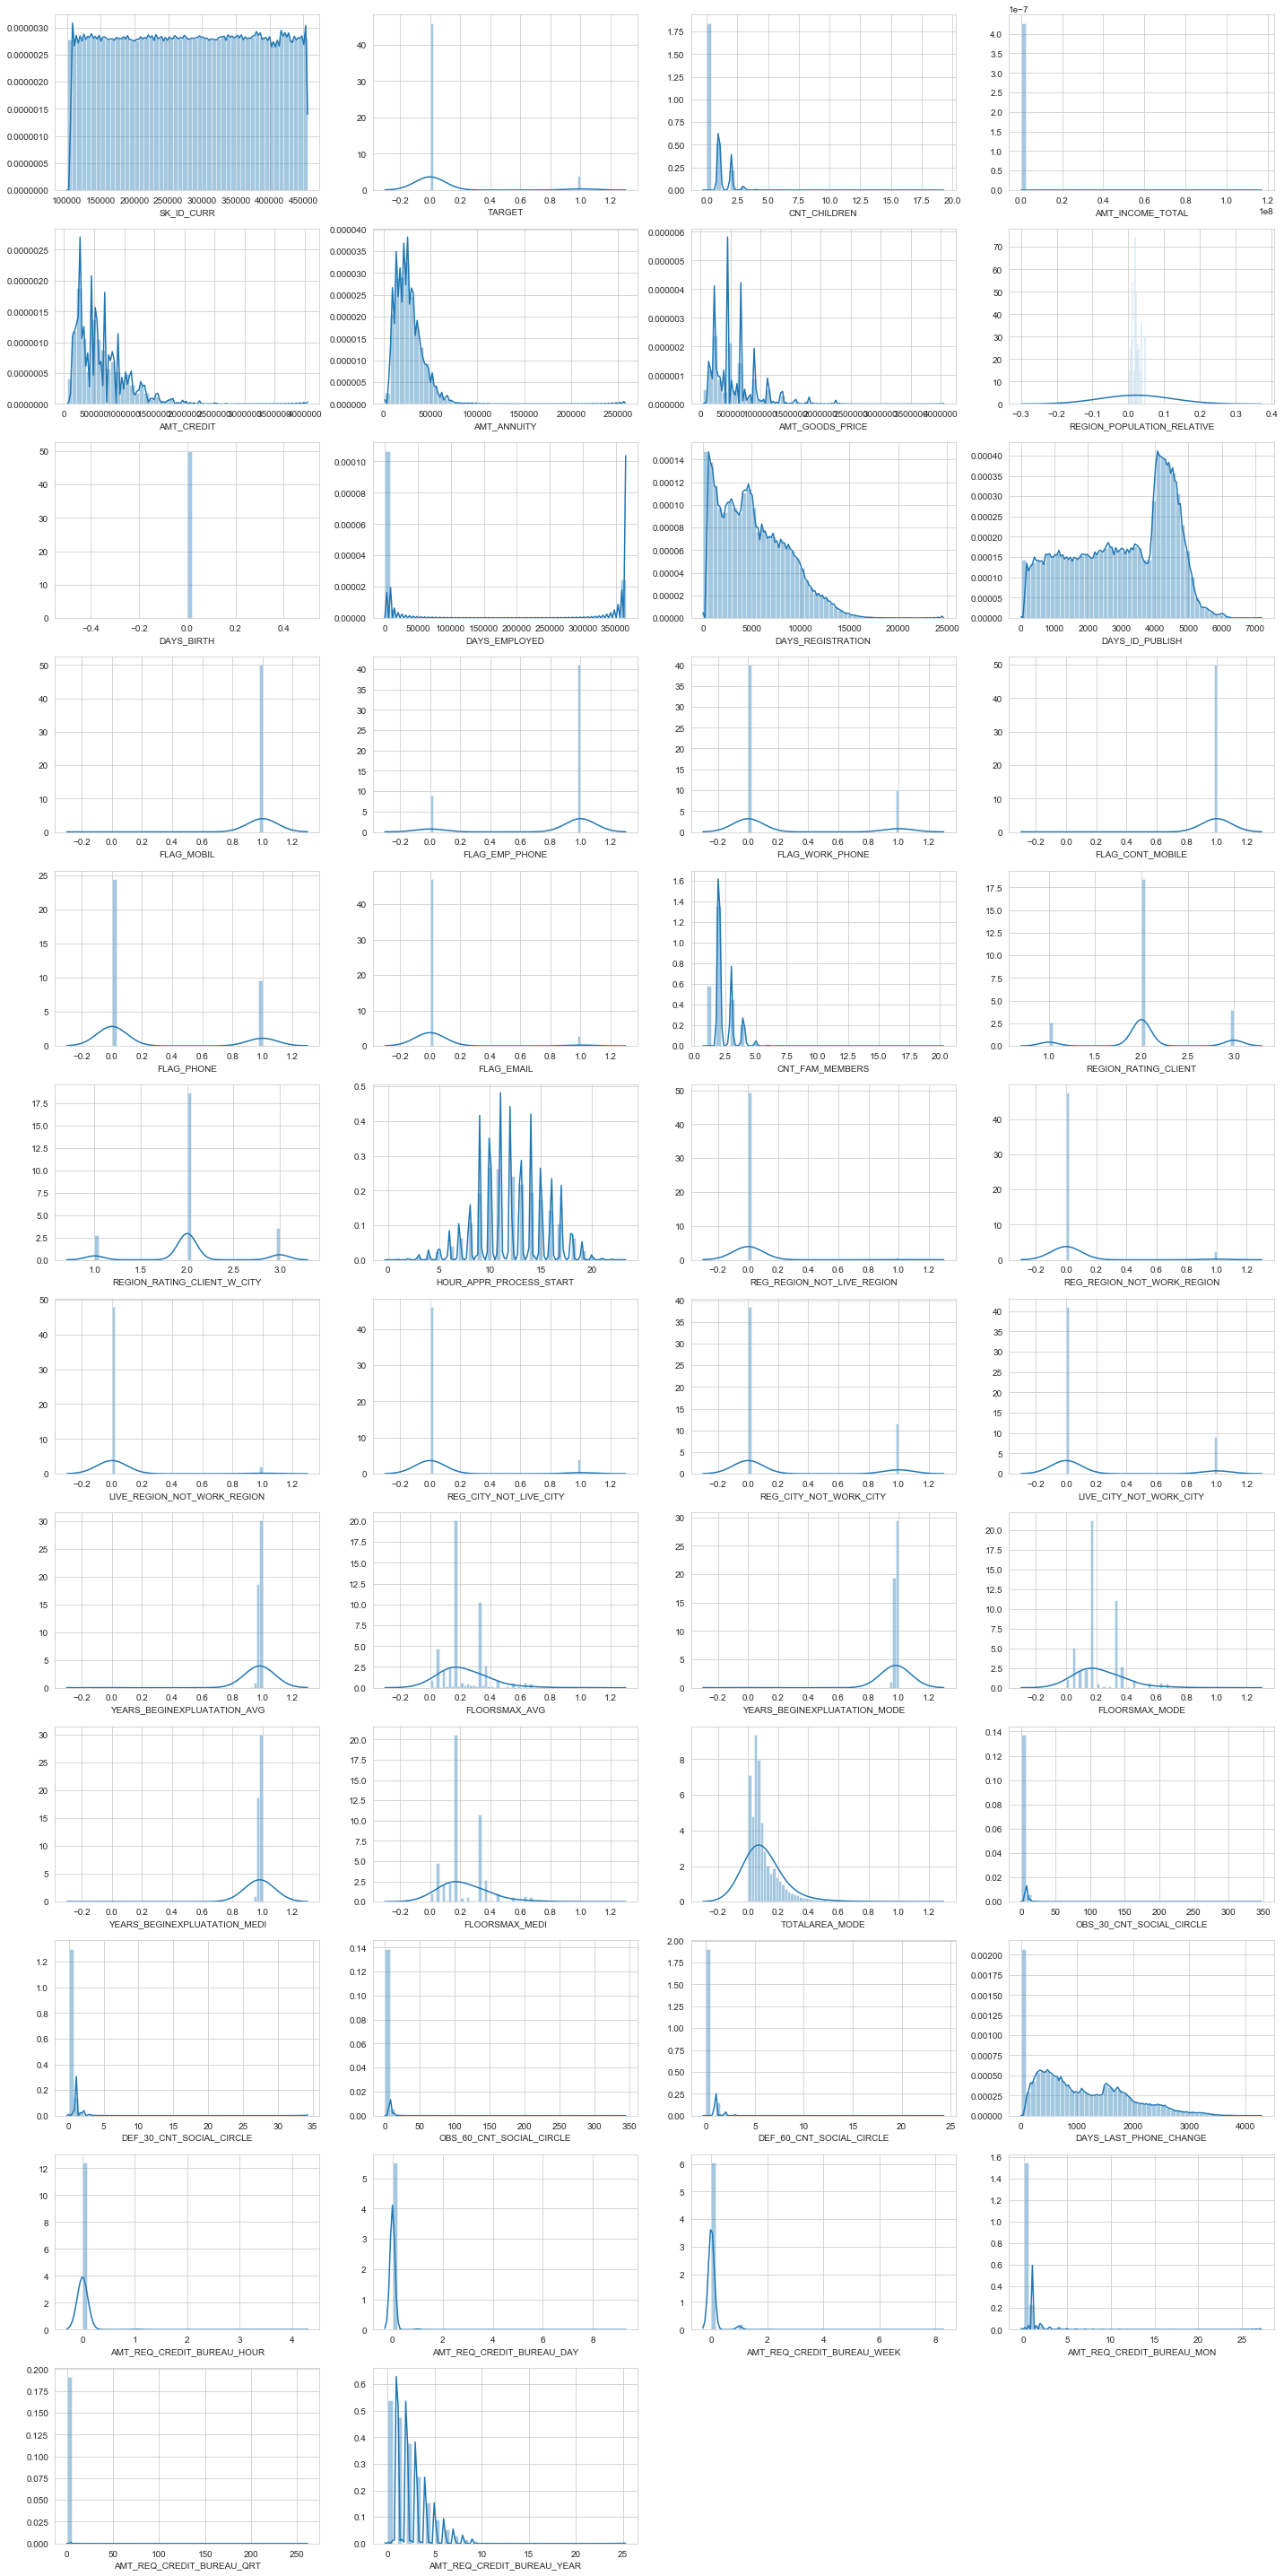

In [85]:
ncols=list(app_data_cl.select_dtypes(exclude=['object','category']))
col_len=len(ncols)

sub=(col_len//4)+1
counter=1

plt.figure(1,figsize=(20,40))

for cols in ncols:
    plt.subplot(sub,4,counter)
    data = app_data_cl[cols]
    sns.distplot(data.dropna(),hist=True,kde_kws={'bw':0.1})
    counter+=1
    
plt.tight_layout()
plt.show()

#### Some key Observations : 
     1.Amt_income_total : 117 million income record is surely an outlier and should be removed from the dataset
     2.Amt_annuity : Based on the column distribution, value with loan annuaity of more than 258k looks like an outlier.
     3.Days_registration : Records with days greater than 24k looks like outliers.
     4.Days_Employed : Noticed values with days greater than 25k (54 years) meaning age is close to 75 (if person started working at 21)

### Distribution check using Bar Plots for some columns

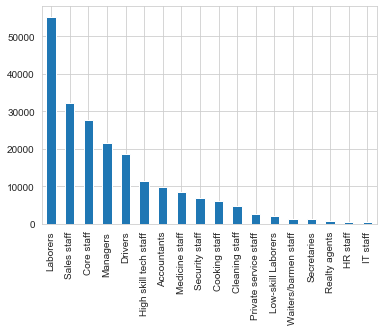

In [106]:
app_data_cl["OCCUPATION_TYPE"].value_counts().plot(kind='bar')
plt.show()

#### We can observe that Labourers, Sales Staff & Core Staff applies the most for loans while IT professionals are on the lower side.

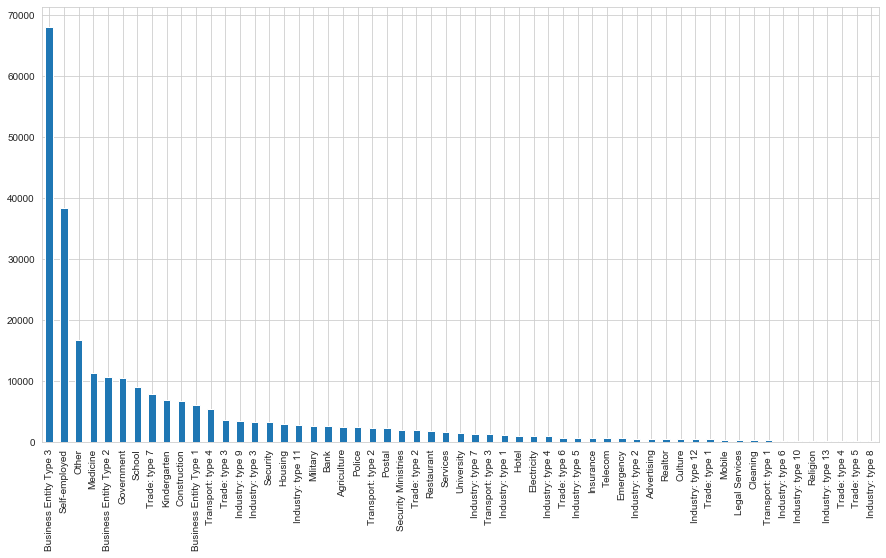

In [110]:
plt.figure(figsize=(15,8))
app_data_cl["ORGANIZATION_TYPE"].value_counts().plot(kind='bar')
plt.show()

#### We can observe that Business Entities & Self Employed people apply the most for loans

### Checking Imbalances in the data

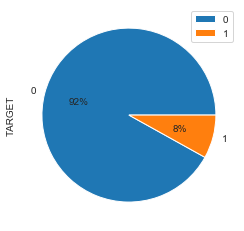

In [124]:
app_data_cl["TARGET"].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.legend()
plt.show()

#### "Target" column has a very high imbalance of data

### Bifurcating the whole data based on Target

In [15]:
tgt0 = app_data_cl.loc[app_data_cl.TARGET == 0]
tgt1 = app_data_cl.loc[app_data_cl.TARGET == 1]

### Univariate Analysis of Categorical Variables (based on Target)

In [16]:
##list of categorical variables 
ctcols=list(app_data_cl.select_dtypes(include=['object','category']))
ctcols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE',
 'AMT_INCOME_RANGE',
 'AMT_CREDIT_RANGE',
 'CAT_WORK_EXPERIENCE',
 'DAYS_BIRTH_BINS']

### Plotting Pie Plots to check data Imbalance for all these columns

#### For Target = 0 (Non-Payment Difficulties)

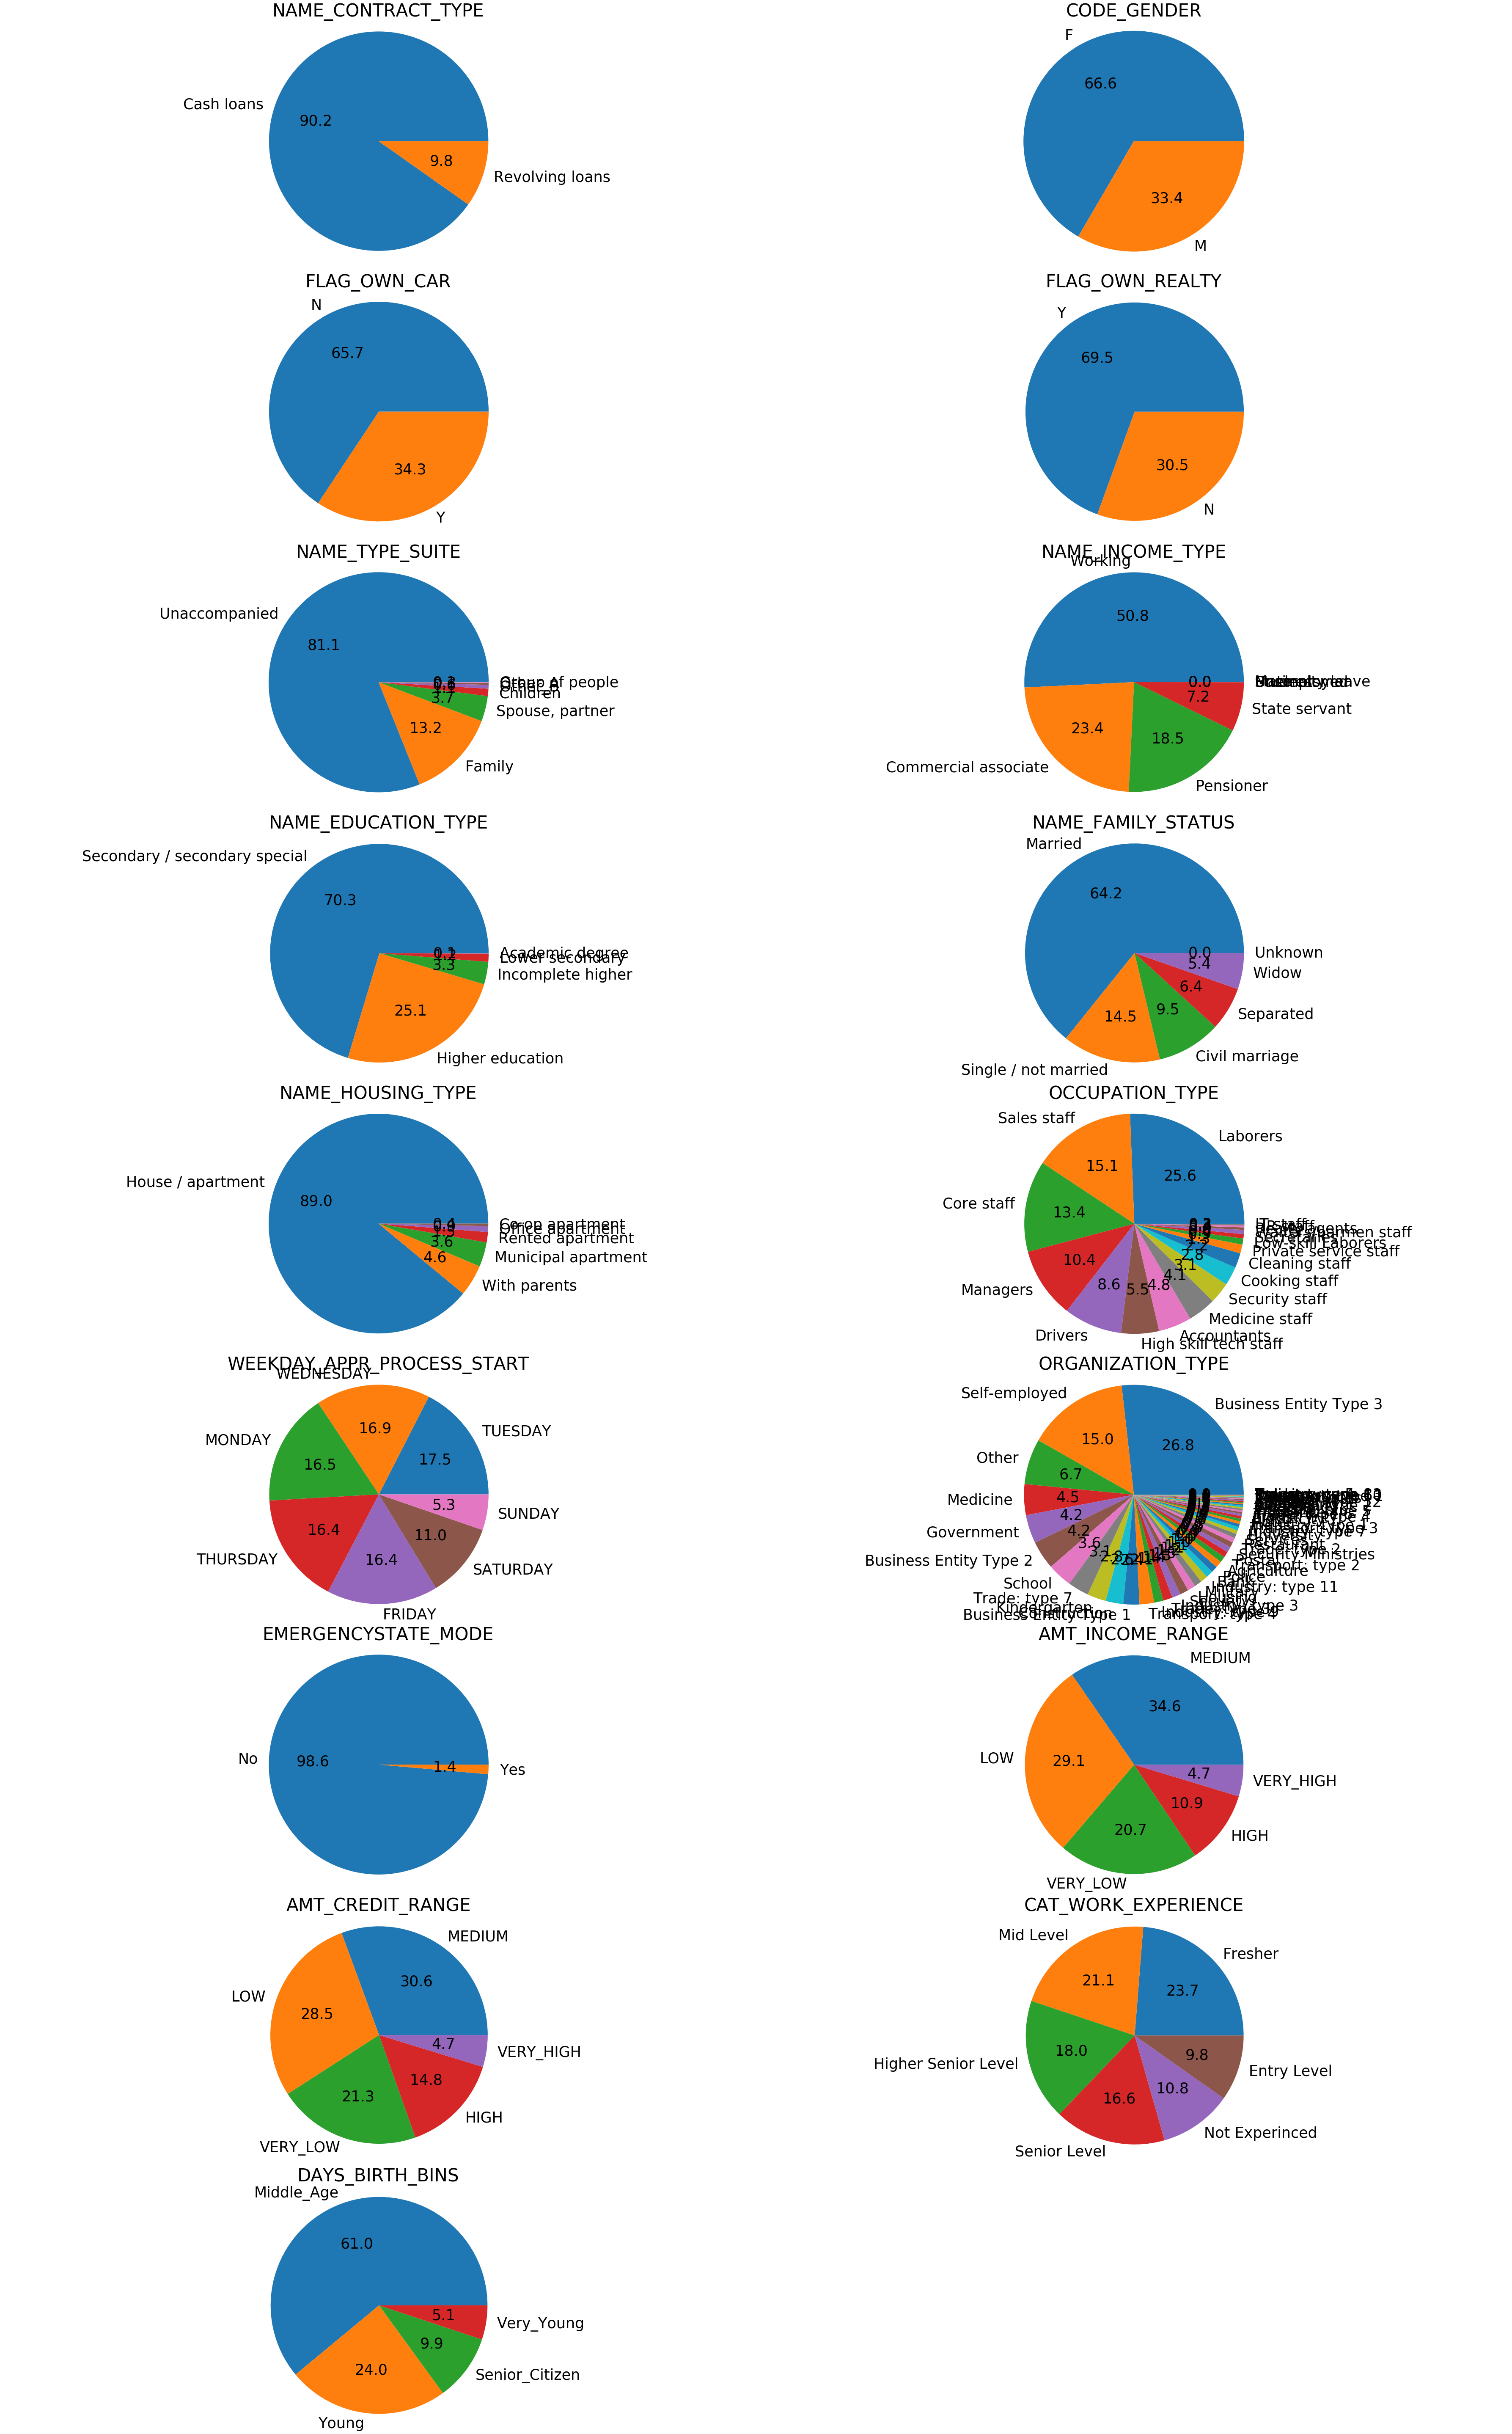

In [29]:
collen=len(ctcols)
calc=(collen//2)+1
counter=1
plt.figure(4,figsize=(50,80))

for columns in ctcols:
    plt.subplot(calc,2,counter)
    df_plot = tgt0[columns].value_counts()
    lst0=df_plot.index.tolist()
    plt.pie(df_plot,labels=lst0,radius=4.0,autopct='%.1f',textprops={'fontsize': 35},labeldistance=1.1)#pctdistance=0.5
    plt.title(columns,fontdict={'fontsize': 42, 'fontweight': 'medium'})
    plt.axis('equal')
    counter+=1

plt.tight_layout()
plt.show()

#### For Target = 1 (Payment Difficulties)

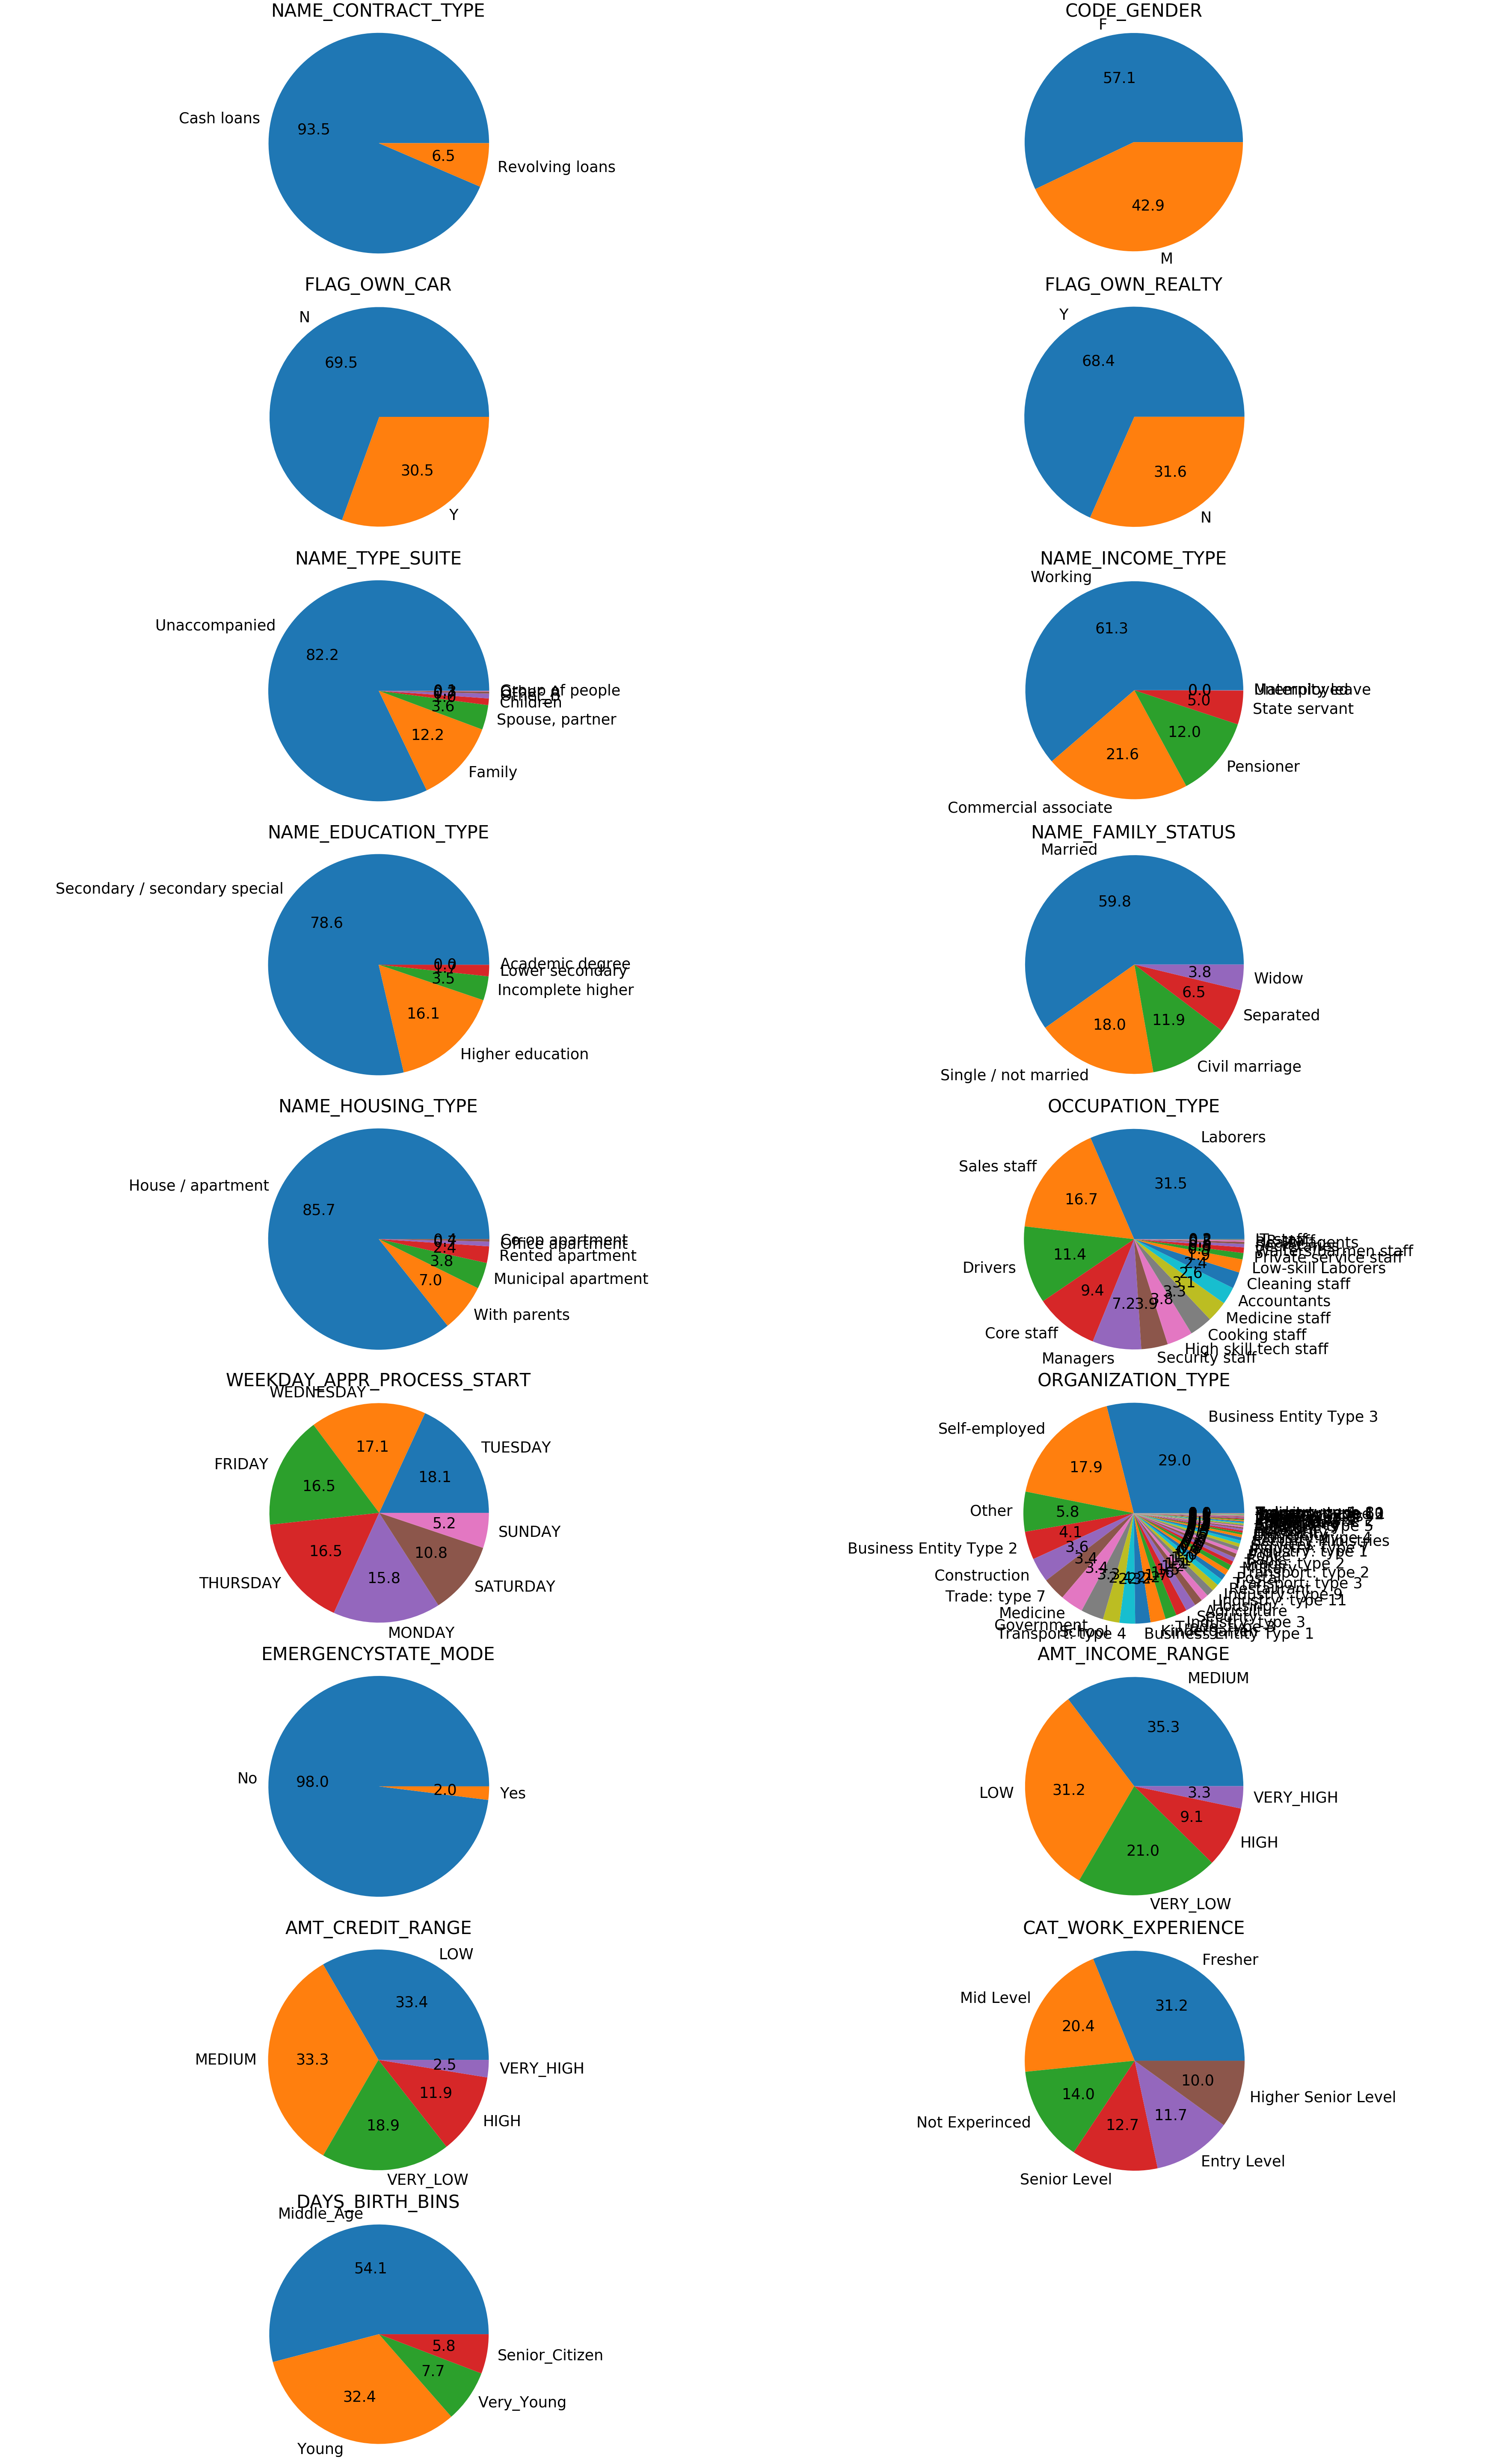

In [30]:
collen=len(ctcols)
calc=(collen//2)+1
counter=1
plt.figure(4,figsize=(50,80))

for columns in ctcols:
    plt.subplot(calc,2,counter)
    df_plot = tgt1[columns].value_counts()
    lst0=df_plot.index.tolist()
    plt.pie(df_plot,labels=lst0,radius=4.0,autopct='%.1f',textprops={'fontsize': 35},labeldistance=1.1)#pctdistance=0.5
    plt.title(columns,fontdict={'fontsize': 42, 'fontweight': 'medium'})
    plt.axis('equal')
    counter+=1

plt.tight_layout()
plt.show()

#### Key Takeaways :
    1. Contract Type : Applicants prefer Cash loans in both the categories. although there was a decrease in payment difficulties for applicants that prefer Revolving Loans.
    2. Gender : Females come out to be holding a majority in terms of loan applications, in both categories (Payment and non payment difficulties). Although there was a notable rise in Male Payment difficulties from Non Payment difficulties.
    3. Income Type : Working class makes the majority (more than 50%) in both the categories. There was a notable decrease in Pensioners that were having Payment difficulties compared to Non-Payment difficulties.
    4. Education : Secondary education is prevalent in the loan applications in both categories, but there was an increase in Payment difficulties compared to Non Payment difficulties. Whereas there was a decrease in Payment difficulties for people with higher education.
    5. Family Status : Married folks make up the majority of the loan applications, though there was a decrease in Payment difficulties for Married & divorced applicants, and there was an increase Payment difficulties for Single/Unmarried & Civil marraige applicants from Non-payment difficulties.
    6. Type of house : Applicants with House/Appt makes up the majority. Though, people who live with their parents show an increase in Payment difficulties compared to non payment difficulties.
    7. Income Range : Applicants with Low incomes showed a notable increase in Payment difficulties compared to non payment difficulties. 
    8. Age Range : Young Loan applicants saw an increase in Payment difficulties compared to non payment difficulties.

### Univariate Analysis of Numerical Variables (Based on Target)

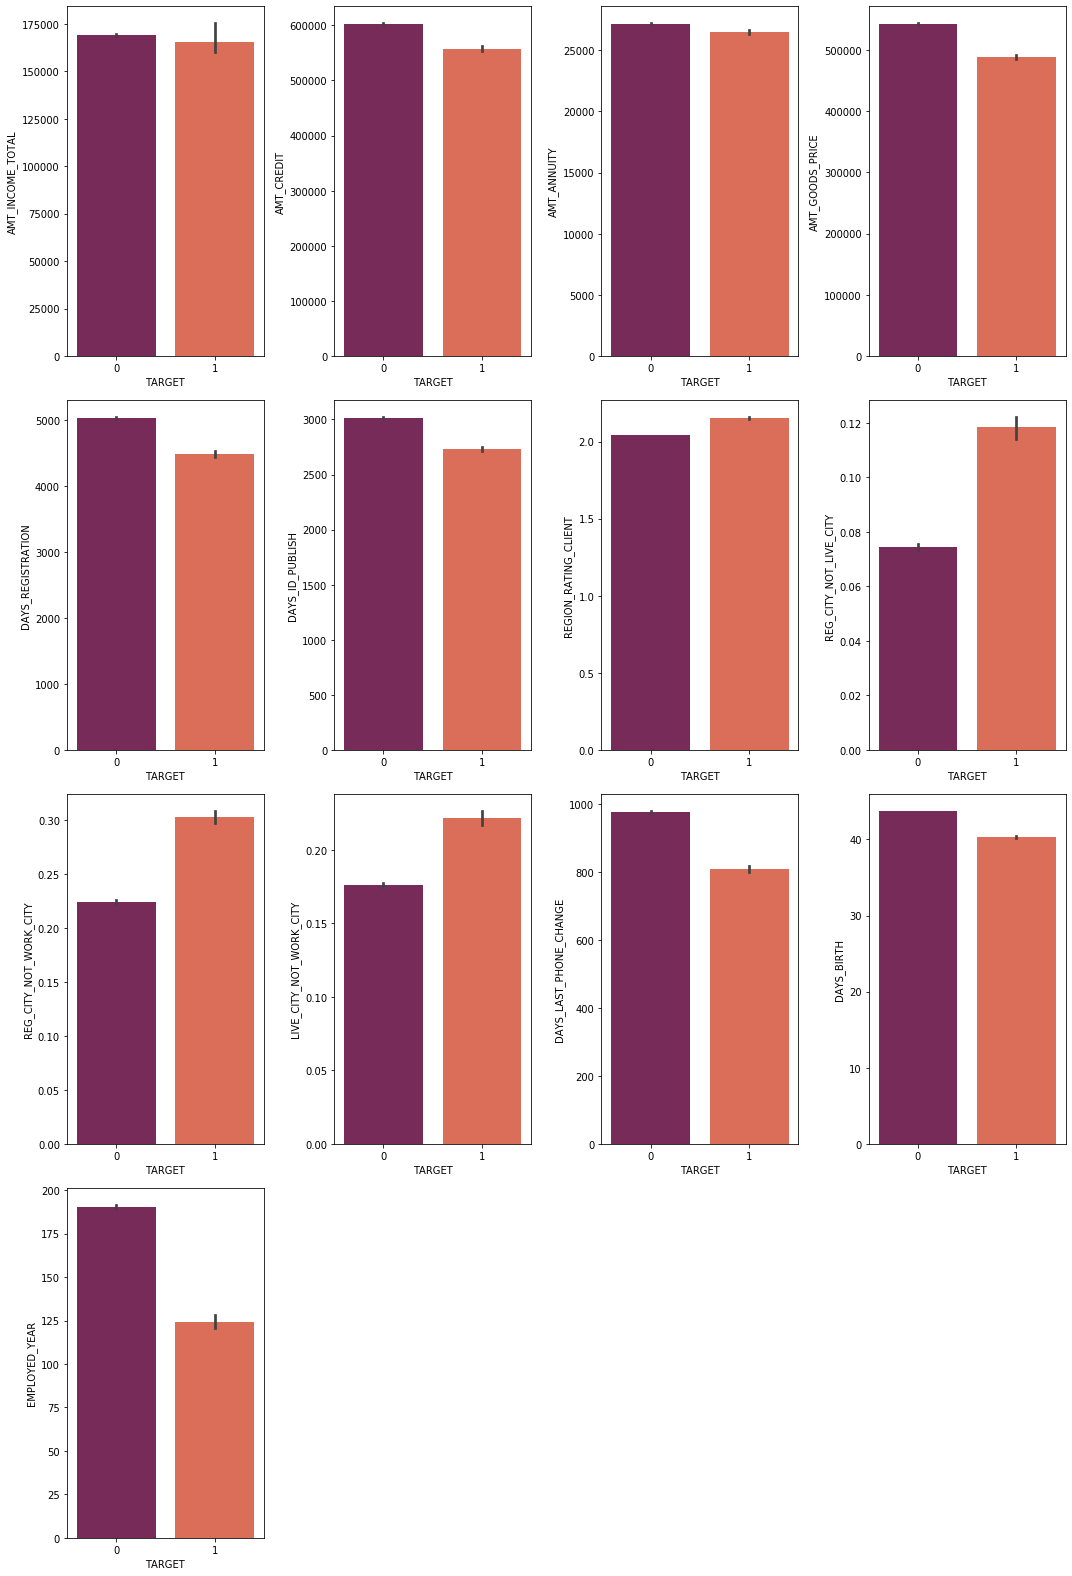

In [54]:
#Numerical Columns
ncols= ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY","AMT_GOODS_PRICE", "DAYS_REGISTRATION",
         "DAYS_ID_PUBLISH", "REGION_RATING_CLIENT","REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", 
              "LIVE_CITY_NOT_WORK_CITY", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "EMPLOYED_YEAR"]
l=len(ncols)
m=(l//4)+1
counter=1
plt.figure(5,figsize=(15,22))
for col in ncols:
    plt.subplot(m,4,counter)
    sns.barplot(y=col,x="TARGET",data=app_data_cl,palette='rocket')
    counter+=1
plt.tight_layout()
plt.show()

#### There was a notable rise in Payment difficulties of applicants whose Live & Registered Cities are different than their Work Cities.

### Correlation of Numerical Variables (based on Target)

In [42]:
#removing non useful columns which gave a lot of nan results
tgt0_cor=tgt0.iloc[0:,2:]
tgt1_cor=tgt1.iloc[0:,2:]
tgt0cor=tgt0_cor.corr(method='spearman')
tgt1cor=tgt1_cor.corr(method='spearman')

#### Correlation for Target=0

In [45]:
tgt0cor

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                          1.00              0.04        0.00   
AMT_INCOME_TOTAL                      0.04              1.00        0.42   
AMT_CREDIT                            0.00              0.42        1.00   
AMT_ANNUITY                           0.02              0.49        0.83   
AMT_GOODS_PRICE                      -0.00              0.42        0.99   
REGION_POPULATION_RELATIVE           -0.03              0.10        0.05   
DAYS_BIRTH                           -0.38             -0.09        0.06   
DAYS_EMPLOYED                        -0.21             -0.10        0.02   
DAYS_REGISTRATION                    -0.18             -0.08       -0.01   
DAYS_ID_PUBLISH                       0.02             -0.04        0.00   
FLAG_MOBIL                            0.00              0.00        0.00   
FLAG_EMP_PHONE                        0.27              0.20        0.08   
FLAG_WORK_PHONE                       0.05             -0.05       -0.03   
FLAG_CONT_MOBILE                     -0.00             -0.01        0.03   
FLAG_PHONE                           -0.04             -0.01        0.02   
FLAG_EMAIL                            0.03              0.10        0.02   
CNT_FAM_MEMBERS                       0.81              0.04        0.08   
REGION_RATING_CLIENT                  0.02             -0.21       -0.09   
REGION_RATING_CLIENT_W_CITY           0.02             -0.23       -0.10   
HOUR_APPR_PROCESS_START               0.00              0.10        0.05   
REG_REGION_NOT_LIVE_REGION           -0.01              0.08        0.02   
REG_REGION_NOT_WORK_REGION            0.02              0.16        0.05   
LIVE_REGION_NOT_WORK_REGION           0.02              0.15        0.05   
REG_CITY_NOT_LIVE_CITY                0.03              0.02       -0.03   
REG_CITY_NOT_WORK_CITY                0.08              0.04       -0.01   
LIVE_CITY_NOT_WORK_CITY               0.07              0.04        0.01   
YEARS_BEGINEXPLUATATION_AVG           0.02              0.05        0.04   
FLOORSMAX_AVG                        -0.01              0.17        0.08   
YEARS_BEGINEXPLUATATION_MODE          0.02              0.05        0.03   
FLOORSMAX_MODE                       -0.01              0.16        0.08   
YEARS_BEGINEXPLUATATION_MEDI          0.02              0.05        0.04   
FLOORSMAX_MEDI                       -0.01              0.16        0.08   
TOTALAREA_MODE                       -0.01              0.13        0.07   
OBS_30_CNT_SOCIAL_CIRCLE              0.02             -0.03        0.00   
DEF_30_CNT_SOCIAL_CIRCLE             -0.00             -0.03       -0.02   
OBS_60_CNT_SOCIAL_CIRCLE              0.02             -0.03        0.00   
DEF_60_CNT_SOCIAL_CIRCLE             -0.00             -0.03       -0.02   
DAYS_LAST_PHONE_CHANGE                0.01              0.06        0.08   
AMT_REQ_CREDIT_BUREAU_HOUR            0.00              0.00       -0.00   
AMT_REQ_CREDIT_BUREAU_DAY             0.00              0.01        0.00   
AMT_REQ_CREDIT_BUREAU_WEEK           -0.00              0.01       -0.00   
AMT_REQ_CREDIT_BUREAU_MON            -0.00              0.07        0.05   
AMT_REQ_CREDIT_BUREAU_QRT            -0.01              0.03        0.02   
AMT_REQ_CREDIT_BUREAU_YEAR           -0.04              0.06       -0.04   
EMPLOYED_YEAR                        -0.21             -0.10        0.02   

                              AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                         0.02            -0.00   
AMT_INCOME_TOTAL                     0.49             0.42   
AMT_CREDIT                           0.83             0.99   
AMT_ANNUITY                          1.00             0.83   
AMT_GOODS_PRICE                      0.83             1.00   
REGION_POPULATION_RELATIVE           0.06             0.06   
DAYS_BIRTH                          -0.01             0.06   
DAYS_EMPLOYED                       -

#### Correlation for Target=1

In [44]:
tgt1cor

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                          1.00             -0.00        0.00   
AMT_INCOME_TOTAL                     -0.00              1.00        0.36   
AMT_CREDIT                            0.00              0.36        1.00   
AMT_ANNUITY                           0.03              0.43        0.81   
AMT_GOODS_PRICE                      -0.01              0.36        0.98   
REGION_POPULATION_RELATIVE           -0.03              0.05        0.04   
DAYS_BIRTH                           -0.27              0.01        0.15   
DAYS_EMPLOYED                        -0.13             -0.04        0.08   
DAYS_REGISTRATION                    -0.13             -0.04        0.02   
DAYS_ID_PUBLISH                       0.03              0.01        0.05   
FLAG_MOBIL                             nan               nan         nan   
FLAG_EMP_PHONE                        0.22              0.14        0.00   
FLAG_WORK_PHONE                       0.04             -0.10       -0.07   
FLAG_CONT_MOBILE                      0.00              0.00        0.04   
FLAG_PHONE                           -0.03             -0.02       -0.00   
FLAG_EMAIL                            0.02              0.10        0.01   
CNT_FAM_MEMBERS                       0.82              0.00        0.07   
REGION_RATING_CLIENT                  0.04             -0.16       -0.05   
REGION_RATING_CLIENT_W_CITY           0.04             -0.17       -0.06   
HOUR_APPR_PROCESS_START              -0.02              0.09        0.03   
REG_REGION_NOT_LIVE_REGION           -0.03              0.08        0.01   
REG_REGION_NOT_WORK_REGION           -0.02              0.16        0.03   
LIVE_REGION_NOT_WORK_REGION          -0.01              0.14        0.03   
REG_CITY_NOT_LIVE_CITY                0.00              0.01       -0.03   
REG_CITY_NOT_WORK_CITY                0.05              0.03       -0.03   
LIVE_CITY_NOT_WORK_CITY               0.05              0.03       -0.01   
YEARS_BEGINEXPLUATATION_AVG           0.00              0.04        0.01   
FLOORSMAX_AVG                        -0.02              0.13        0.07   
YEARS_BEGINEXPLUATATION_MODE          0.00              0.03        0.01   
FLOORSMAX_MODE                       -0.02              0.12        0.07   
YEARS_BEGINEXPLUATATION_MEDI          0.00              0.03        0.01   
FLOORSMAX_MEDI                       -0.02              0.13        0.07   
TOTALAREA_MODE                       -0.02              0.10        0.06   
OBS_30_CNT_SOCIAL_CIRCLE              0.03              0.00        0.02   
DEF_30_CNT_SOCIAL_CIRCLE             -0.00             -0.02       -0.02   
OBS_60_CNT_SOCIAL_CIRCLE              0.03              0.00        0.02   
DEF_60_CNT_SOCIAL_CIRCLE             -0.01             -0.02       -0.03   
DAYS_LAST_PHONE_CHANGE               -0.01              0.08        0.10   
AMT_REQ_CREDIT_BUREAU_HOUR            0.00              0.01        0.00   
AMT_REQ_CREDIT_BUREAU_DAY            -0.01             -0.00       -0.00   
AMT_REQ_CREDIT_BUREAU_WEEK           -0.00              0.02        0.00   
AMT_REQ_CREDIT_BUREAU_MON            -0.01              0.08        0.04   
AMT_REQ_CREDIT_BUREAU_QRT            -0.02              0.03       -0.02   
AMT_REQ_CREDIT_BUREAU_YEAR           -0.04              0.08       -0.03   
EMPLOYED_YEAR                        -0.13             -0.04        0.08   

                              AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                         0.03            -0.01   
AMT_INCOME_TOTAL                     0.43             0.36   
AMT_CREDIT                           0.81             0.98   
AMT_ANNUITY                          1.00             0.80   
AMT_GOODS_PRICE                      0.80             1.00   
REGION_POPULATION_RELATIVE           0.02             0.05   
DAYS_BIRTH                           0.03             0.16   
DAYS_EMPLOYED                       -

### Plotting Correlation Matrix 
#### (For Target=0)

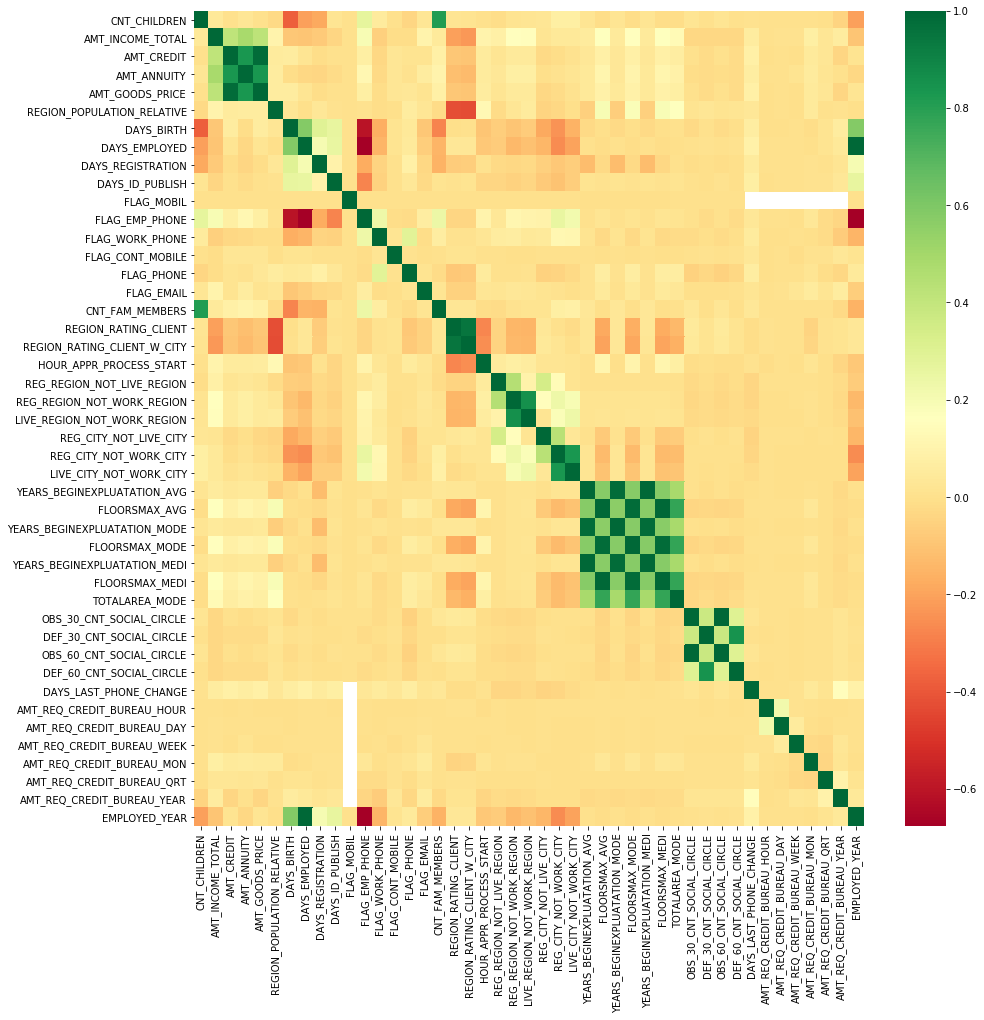

In [57]:
plt.figure(figsize=(15,15))
sns.heatmap(tgt0cor, xticklabels=True, yticklabels=True,cmap="RdYlGn")
plt.show()

### Plotting Correlation Matrix 
#### (For Target=1)

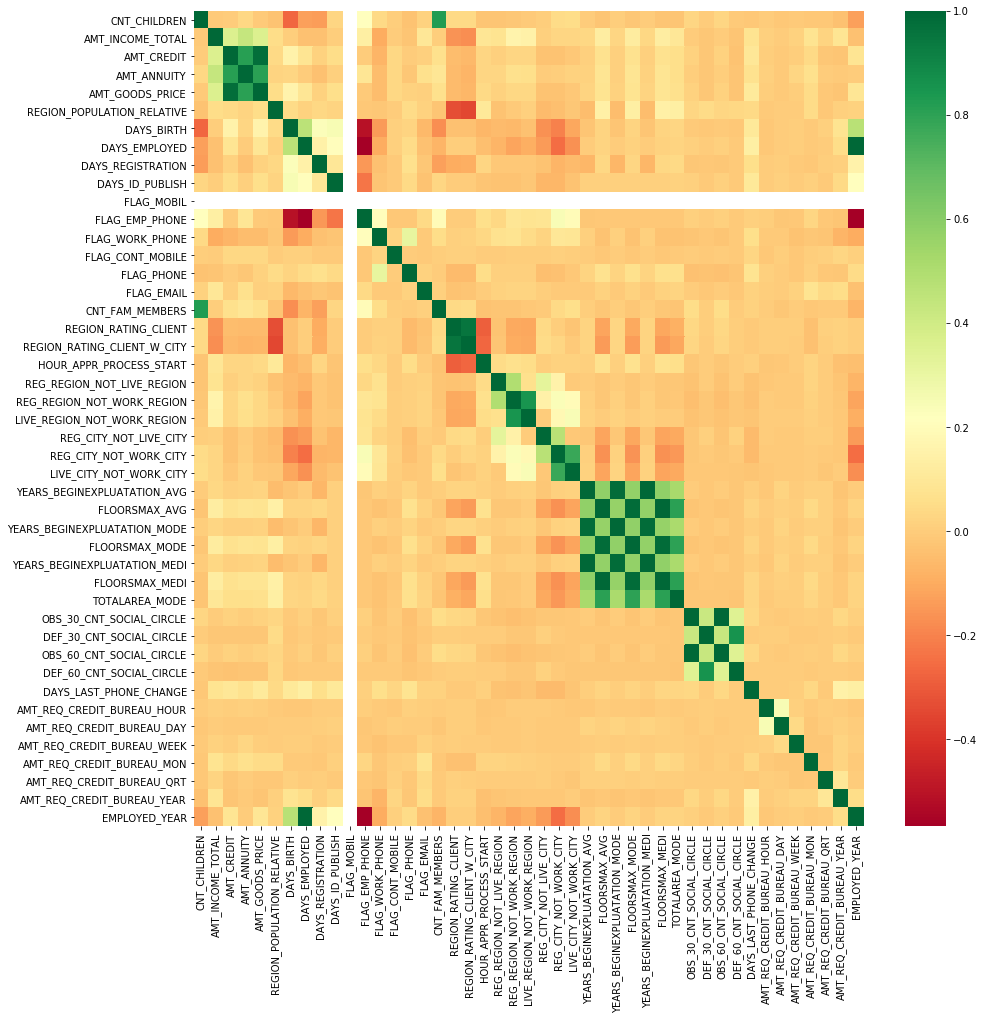

In [60]:
plt.figure(figsize=(15,15))
sns.heatmap(tgt1cor, xticklabels=True, yticklabels=True,cmap="RdYlGn")
plt.show()

#### Observations : 
There is a high correlation between credit amount and goods price. Some deviancies are noticeable in the correlation for credit amount & Income for both the targets.

## Bivariate Analysis of Categorical v/s Numerical Variables (based on Target)

### Analysis of Education v/s Credit Amount (basis different Family statuses)
#### For Target = 0

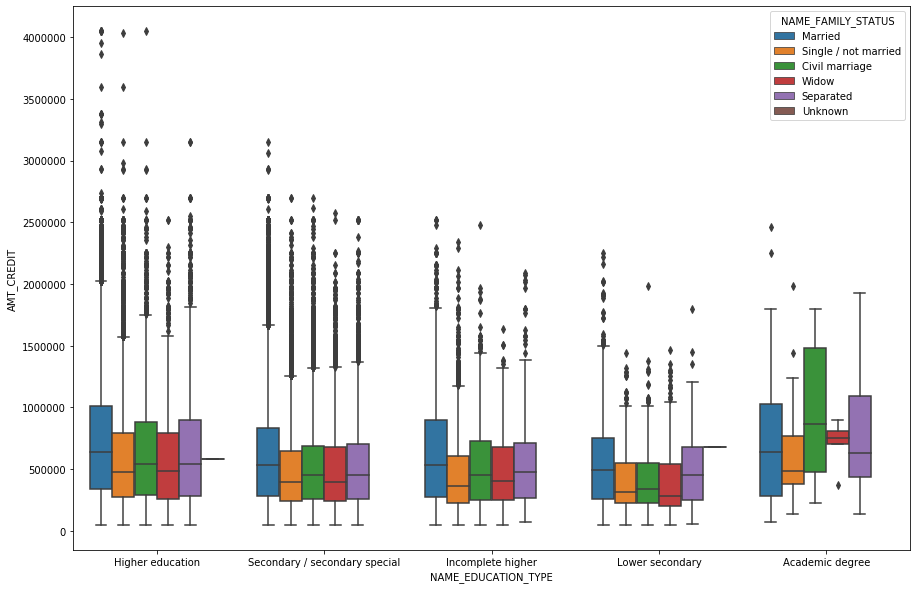

In [69]:
plt.figure(figsize=(15,10))
sns.boxplot(data=tgt0, x="NAME_EDUCATION_TYPE", y="AMT_CREDIT", hue='NAME_FAMILY_STATUS')
plt.show()

#### For Target = 1

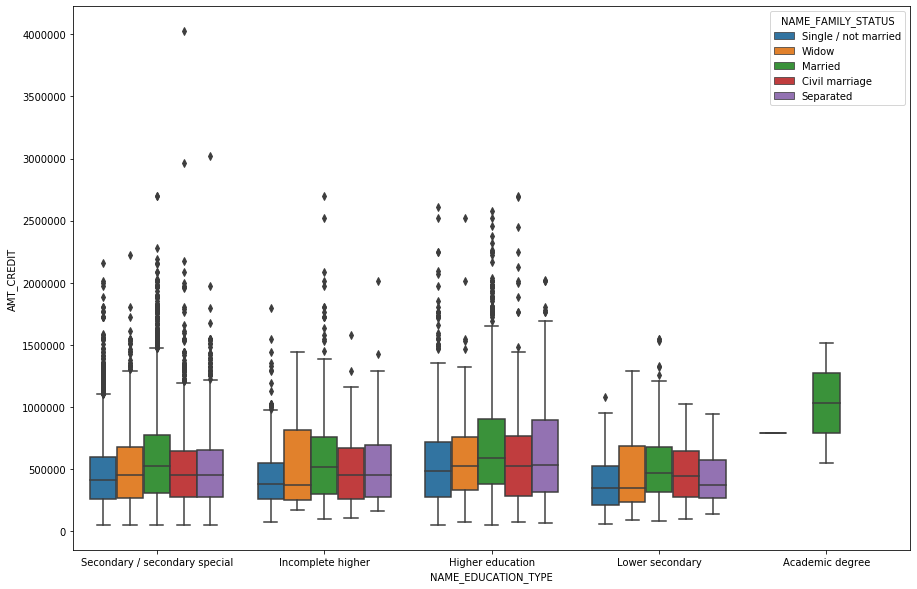

In [71]:
plt.figure(figsize=(15,10))
sns.boxplot(data=tgt1, x="NAME_EDUCATION_TYPE", y="AMT_CREDIT", hue='NAME_FAMILY_STATUS')
plt.show()

Observations : The applicants with status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are getting maximum credit sanctioned compared to others. Majority of the outliers are from  'Higher education' and 'Secondary'. Married folks made the majority of the records with Loan difficulties with Academic Degree.

### Analysis of Income Range v/s Credit Amount (basis different Family statuses)
#### For Target = 0

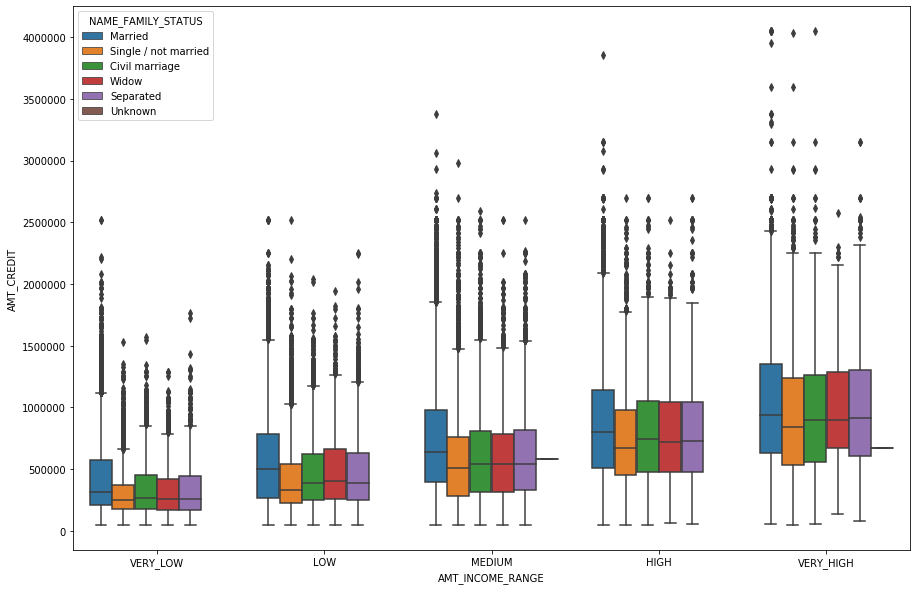

In [72]:
plt.figure(figsize=(15,10))
sns.boxplot(data=tgt0, x="AMT_INCOME_RANGE", y="AMT_CREDIT", hue='NAME_FAMILY_STATUS')
plt.show()

#### For Target = 1

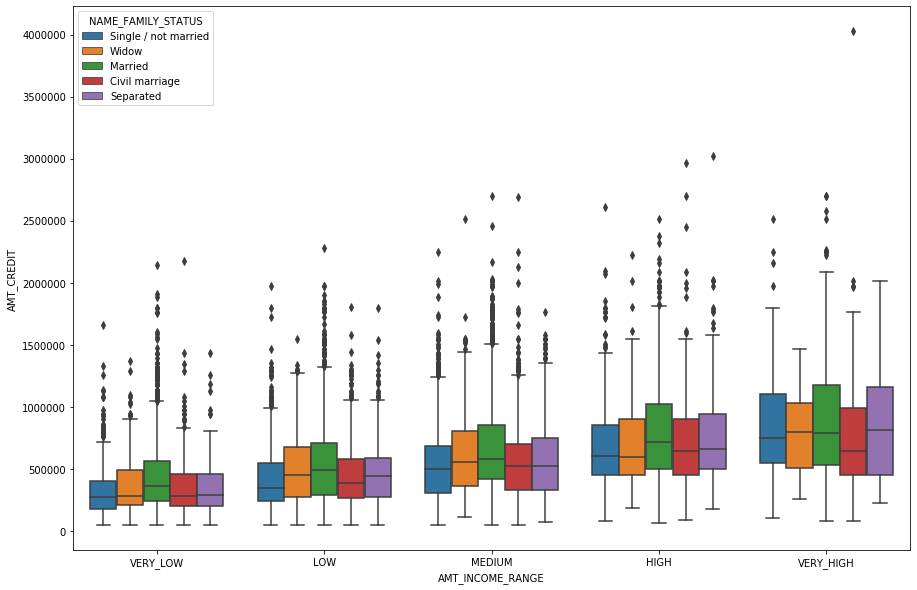

In [74]:
plt.figure(figsize=(15,10))
sns.boxplot(data=tgt1, x="AMT_INCOME_RANGE", y="AMT_CREDIT", hue='NAME_FAMILY_STATUS')
plt.show()

#### Single, Separated & Married applicants with "Very high" income range have relatively higher credit sanctioned compared to other categories.

## Bivariate Analysis of Categorical v/s Categorical Variables (based on Target)

### Realty Owned Flag v/s Gender (for both Targets)

<Figure size 1080x360 with 0 Axes>

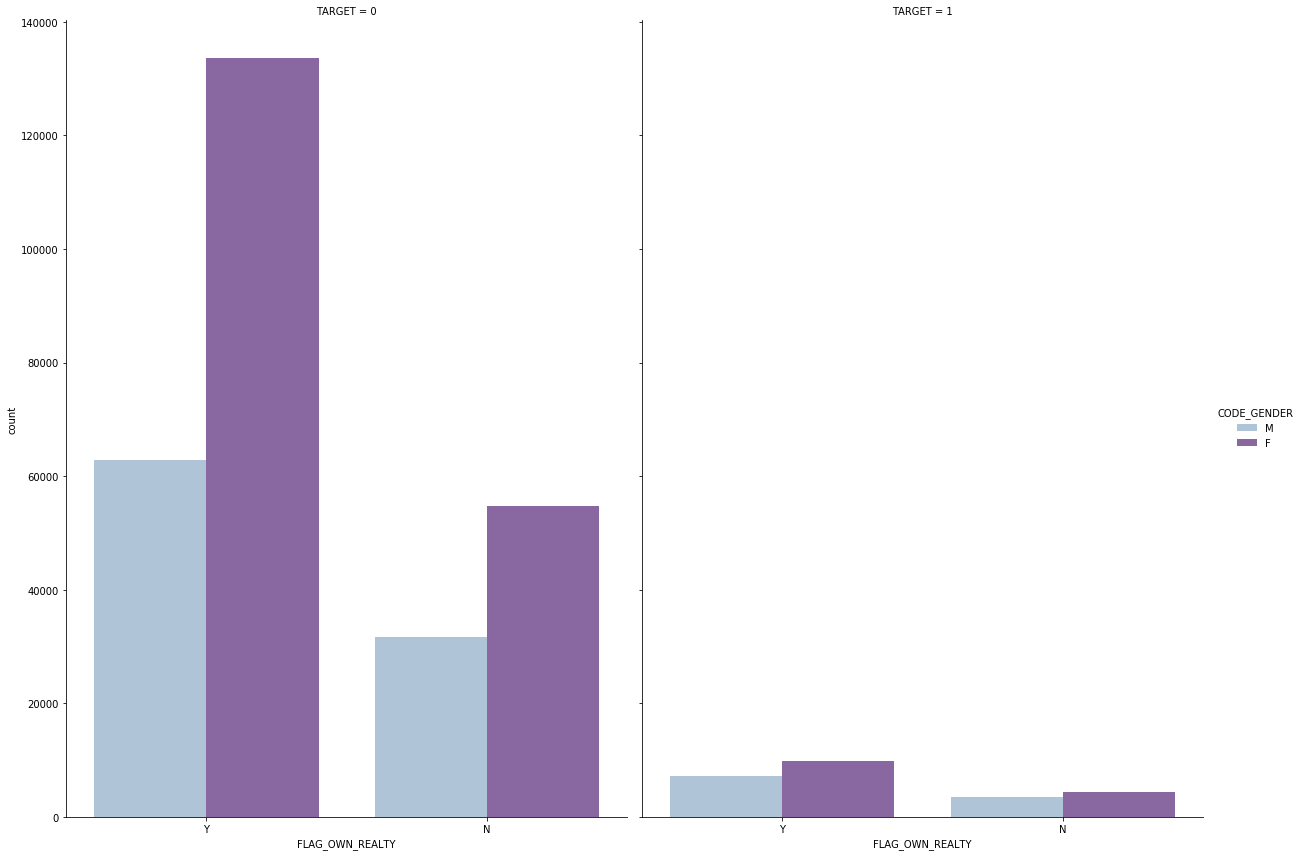

In [18]:
col = "FLAG_OWN_REALTY"
gen = "CODE_GENDER"
tar = 'TARGET'
plt.figure(6,figsize=(15,5))
sns.catplot(x=col, hue= gen, col= tar, data=app_data_cl, kind="count", height = 12, aspect = 0.7, palette = 'BuPu')
plt.xticks(rotation=0)
plt.show()

### Education Type v/s Family Status (for both Targets)

<Figure size 1440x360 with 0 Axes>

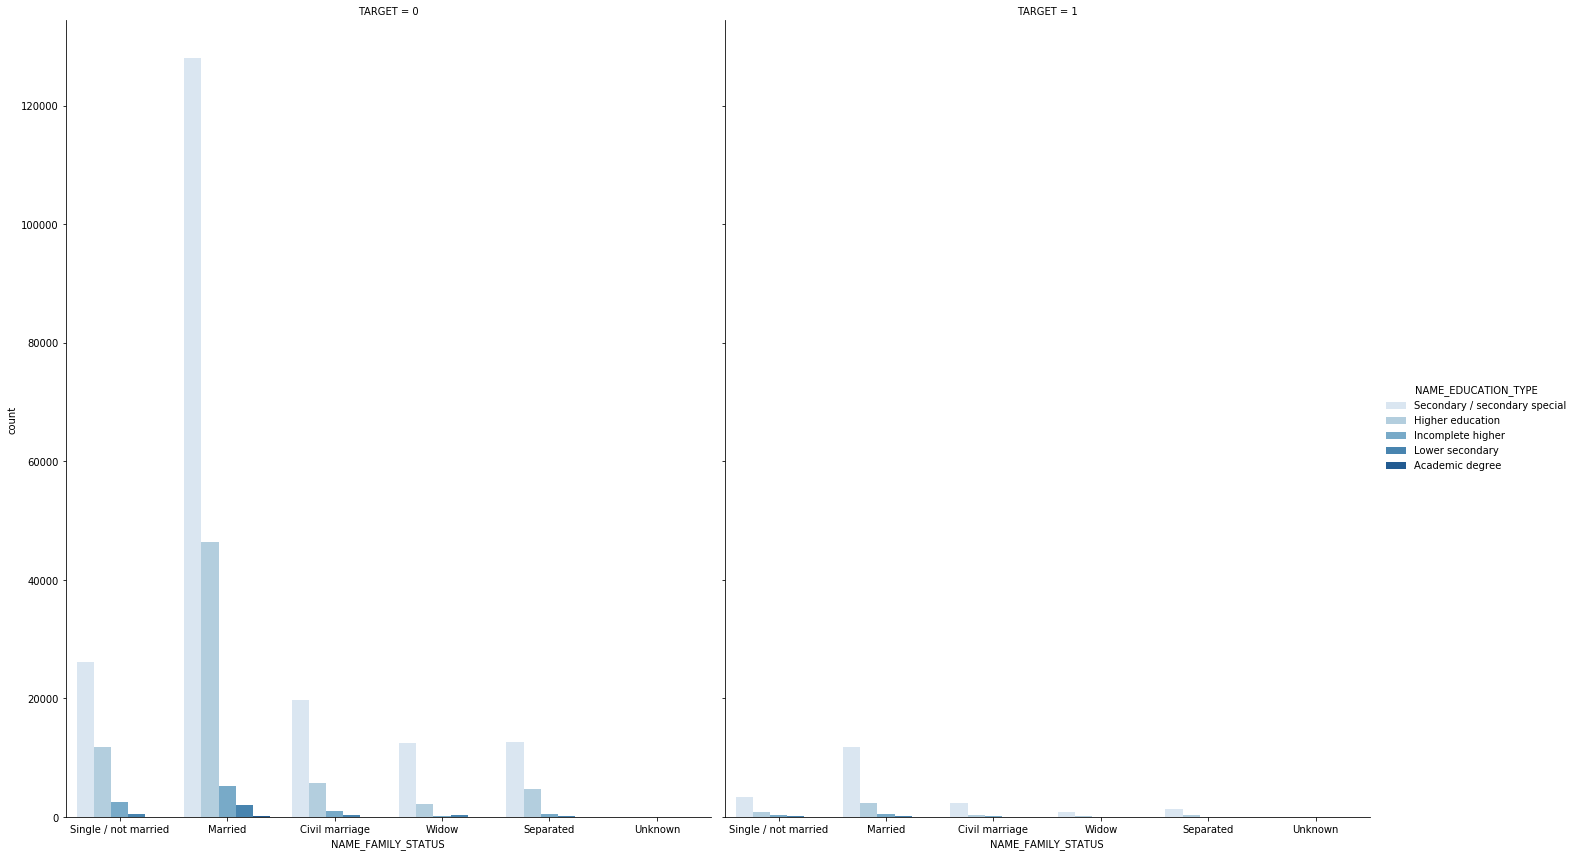

In [19]:
col = "NAME_FAMILY_STATUS"
hu = "NAME_EDUCATION_TYPE"
tar = 'TARGET'
plt.figure(6,figsize=(20,5))
sns.catplot(x=col, hue= hu, col= tar,data=app_data_cl, kind="count", height = 12, aspect = 0.8, palette = 'Blues')
plt.show()

### Multivariate analysis of Education Type, Gender & Income Range

In [20]:
#creating pivot table for multivariate analysis of three variables
pvtb = pd.pivot_table(app_data_cl, values='TARGET', index=['CODE_GENDER','AMT_INCOME_RANGE'],columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)

In [21]:
pvtb

NAME_EDUCATION_TYPE           Academic degree  Higher education  \
CODE_GENDER AMT_INCOME_RANGE                                      
F           VERY_LOW                     0.00              0.06   
            LOW                          0.00              0.05   
            MEDIUM                       0.00              0.05   
            HIGH                         0.11              0.04   
            VERY_HIGH                    0.08              0.04   
M           VERY_LOW                     0.00              0.08   
            LOW                          0.00              0.07   
            MEDIUM                       0.00              0.07   
            HIGH                         0.00              0.06   
            VERY_HIGH                    0.00              0.04   

NAME_EDUCATION_TYPE           Incomplete higher  Lower secondary  \
CODE_GENDER AMT_INCOME_RANGE                                       
F           VERY_LOW                       0.09             0.08   
            LOW                            0.08             0.11   
            MEDIUM                         0.08             0.10   
            HIGH                           0.07             0.04   
            VERY_HIGH                      0.08             0.07   
M           VERY_LOW                       0.12             0.12   
            LOW                            0.10             0.14   
            MEDIUM                         0.10             0.15   
            HIGH                           0.07             0.08   
            VERY_HIGH                      0.08             0.06   

NAME_EDUCATION_TYPE           Secondary / secondary special  
CODE_GENDER AMT_INCOME_RANGE                                 
F           VERY_LOW                                   0.08  
            LOW                                        0.08  
            MEDIUM                                     0.08  
            HIGH                                       0.07  
            VERY_HIGH                                  0.07  
M           VERY_LOW                                   0.12  
            LOW                                        0.12  
            MEDIUM                                     0.11  
            HIGH                                       0.09  
            VERY_HIGH                                  0.09

#### Observations
    1. Female category: Applicants with LOW income and ACADEMIC DEGREE education have maximum number of Loan-Payment Difficulties
    2. Male category: Applicants with MEDIUM income and LOWER SECONDARY education have maximum number of Loan-Payment Difficulties

## Bivariate Analysis of Numerical v/s Numerical Variables (based on Target)

### For Target = 0

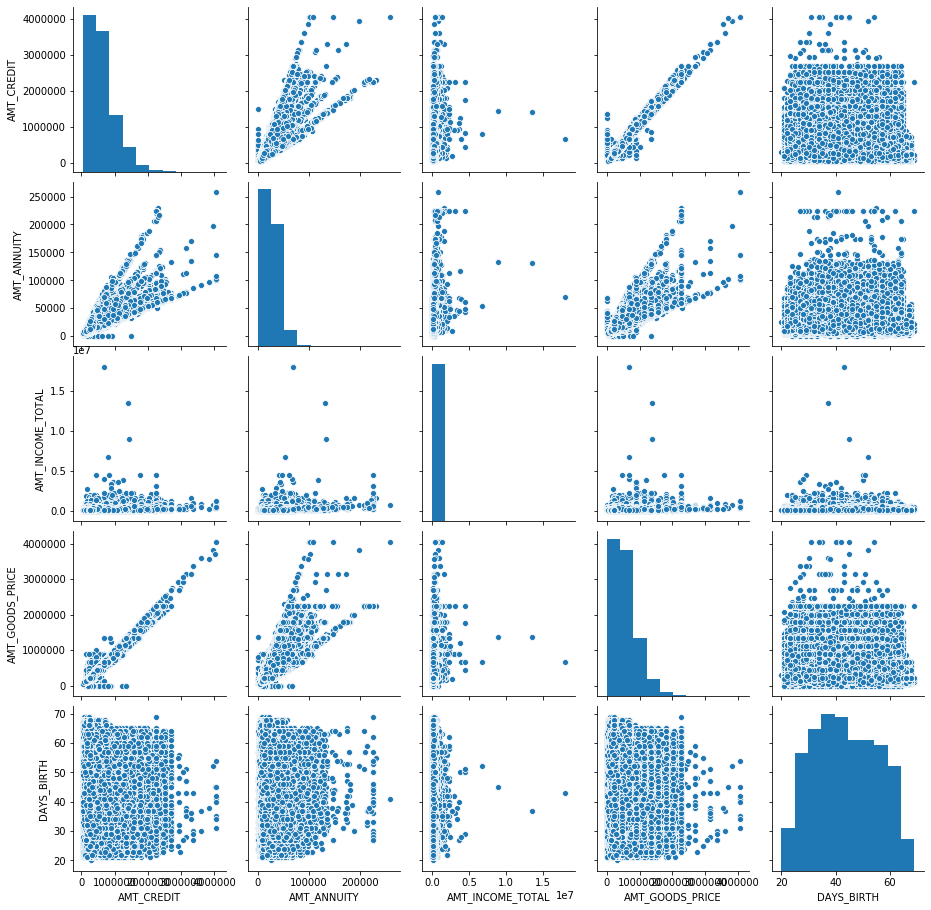

In [22]:
pairs = tgt0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pairs)
plt.show()

### For Target = 1

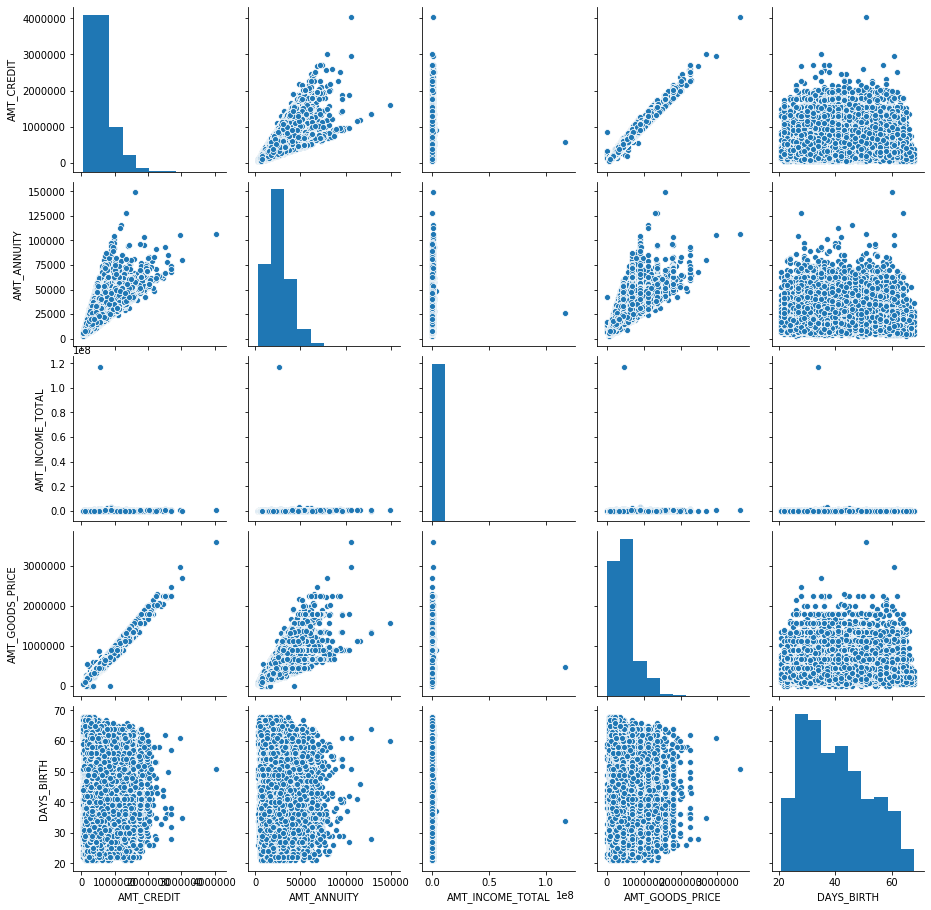

In [23]:
pairs = tgt1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pairs)
plt.show()

## Analysis of Previous Application Data

#### Checking dimensions of the data

In [46]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [48]:
prev_app.shape

(1670214, 37)

In [49]:
prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1,730.43        17,145.00   
1     2802425      108129         Cash loans    25,188.62       607,500.00   
2     2523466      122040         Cash loans    15,060.74       112,500.00   
3     2819243      176158         Cash loans    47,041.33       450,000.00   
4     1784265      202054         Cash loans    31,924.40       337,500.00   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0   17,145.00              0.00        17,145.00                   SATURDAY   
1  679,671.00               nan       607,500.00                   THURSDAY   
2  136,444.50               nan       112,500.00                    TUESDAY   
3  470,790.00               nan       450,000.00                     MONDAY   
4  404,055.00               nan       337,500.00                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1               0.00                   0.18   
1                       1                nan                    nan   
2                       1                nan                    nan   
3                       1                nan                    nan   
4                       1                nan                    nan   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                      0.87                    XAP             Approved   
1                       nan                    XNA             Approved   
2                       nan                    XNA             Approved   
3                       nan                    XNA             Approved   
4                       nan                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0        12.00           middle  POS mobile with interest          365,243.00   
1        36.00       low_action          Cash X-Sell: low          365,243.00   
2        12.00             high         Cash X-Sell: high          365,243.00   
3        12.00           middle       Cash X-Sell: middle          365,243.00   
4        24.00             high         Cash Street: high                 nan   

   D

#### Summary Statistics of the data

In [47]:
prev_app.describe()

SK_ID_PREV   SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION   AMT_CREDIT  \
count 1,670,214.00 1,670,214.00 1,297,979.00     1,670,214.00 1,670,213.00   
mean  1,923,089.14   278,357.17    15,955.12       175,233.86   196,114.02   
std     532,597.96   102,814.82    14,782.14       292,779.76   318,574.62   
min   1,000,001.00   100,001.00         0.00             0.00         0.00   
25%   1,461,857.25   189,329.00     6,321.78        18,720.00    24,160.50   
50%   1,923,110.50   278,714.50    11,250.00        71,046.00    80,541.00   
75%   2,384,279.75   367,514.00    20,658.42       180,360.00   216,418.50   
max   2,845,382.00   456,255.00   418,058.15     6,905,160.00 6,905,160.00   

       AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count        774,370.00     1,284,699.00             1,670,214.00   
mean           6,697.40       227,847.28                    12.48   
std           20,921.50       315,396.56                     3.33   
min               -0.90             0.00                     0.00   
25%                0.00        50,841.00                    10.00   
50%            1,638.00       112,320.00                    12.00   
75%            7,740.00       234,000.00                    15.00   
max        3,060,045.00     6,905,160.00                    23.00   

       NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
count            1,670,214.00         774,370.00               5,951.00   
mean                     1.00               0.08                   0.19   
std                      0.06               0.11                   0.09   
min                      0.00              -0.00                   0.03   
25%                      1.00               0.00                   0.16   
50%                      1.00               0.05                   0.19   
75%                      1.00               0.11                   0.19   
max                      1.00               1.00                   1.00   

       RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  \
count                  5,951.00   1,670,214.00      1,670,214.00 1,297,984.00   
mean                       0.77        -880.68            313.95        16.05   
std                        0.10         779.10          7,127.44        14.57   
min                        0.37      -2,922.00             -1.00         0.00   
25%                        0.72      -1,300.00             -1.00         6.00   
50%                        0.84        -581.00              3.00        12.00   
75%                        0.85        -280.00             82.00        24.00   
max                        1.00          -1.00      4,000,000.00        84.00   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count          997,149.00      997,149.00                 997,149.00   
mean           342,209.86       13,826.27                  33,767.77   
std             88,916.12       72,444.87                 106,857.03   
min             -2,922.00       -2,892.00                  -2,801.00   
25%            365,243.00       -1,628.00                  -1,242.00   
50%            365,243.00         -831.00                    -361.00   
75%            365,243.00         -411.00                     129.00   
max            365,243.00      365,243.00                 365,243.00   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count     997,149.00        997,149.00                 997,149.00  
mean       76,582.40         81,992.34                       0.33  
std       149,647.42        153,303.52                       0.47  
min        -2,889.00         -2,874.00                       0.00  
25%        -1,314.00         -1,270.00                       0.00  
50%          -537.00           -499.00                       0.00  
75%           -74.00            -44.00                       1.00  
max       365,243.00        365,243.00                       1.00

### Data Quality Checks & treating missing/wrong values

#### Converting Days from negative to positive range

In [ ]:
filter_col = [col for col in prev_app if col.startswith('DAYS')]
prev_app[filter_col]= abs(prev_app[filter_col])

#### Calculating Null value percentage in columns and removing more than 90% Null value Columns

In [28]:
prev_nullcols = round(100*(prev_app.isnull().sum()/len(prev_app.index)),2).sort_values(ascending=False)
coltodel = list(prev_nullcols[prev_nullcols.values>90].index)
prev_cl = prev_app.drop(coltodel, axis=1)

#### Dropping Duplicates

In [29]:
prev_cl.drop_duplicates(subset=None, inplace=True)

#### Data Imputation of Null Values

In [30]:
prev_cl=prev_cl.replace('XNA', np.NaN)
prev_cl=prev_cl.replace('XAP', np.NaN)

### Univariate Analysis on Previous Application Data

### Cash Loan Purpose v/s Contract Loan Status

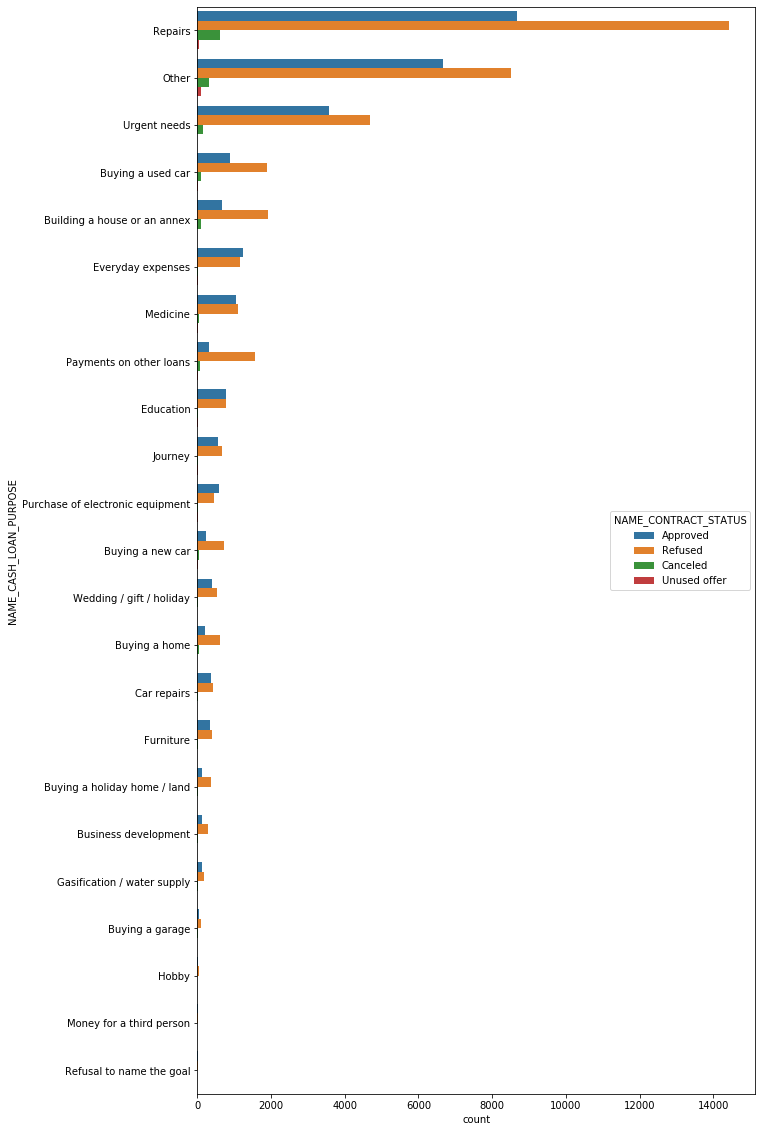

In [33]:
plt.figure(figsize=(10,20))
sns.countplot(data =prev_cl,y= 'NAME_CASH_LOAN_PURPOSE',order=prev_cl['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')
plt.show()

#### Observations:
    1. Repairs as a Cash Loan purpose showed most loan rejections.
    2. For purpose of Education the approval:rejection ratio was close to 1:1
    3. Buying a car & Paying other loans had higher rejection rate.

### Segmented Univariate Analysis
#### Goods Price v/s Contract Status

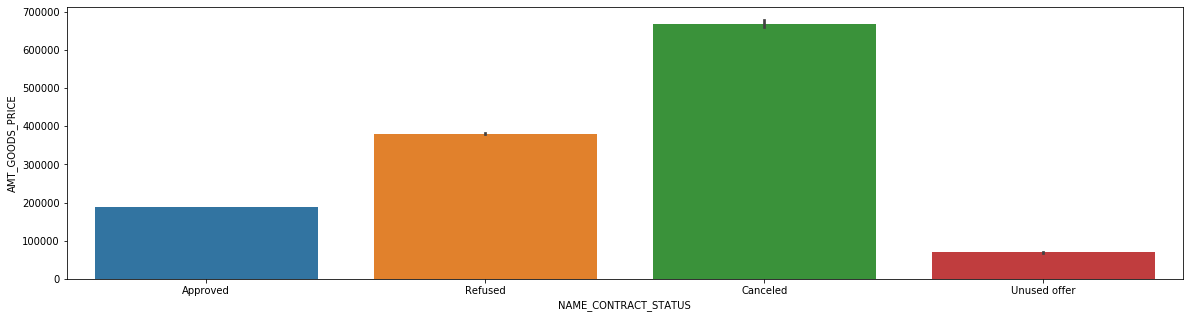

In [34]:
plt.figure(5,figsize=(20,5))    
sns.barplot(y="AMT_GOODS_PRICE",x="NAME_CONTRACT_STATUS",data=prev_cl)
plt.show()

#### Down Payment Amount v/s Contract Status

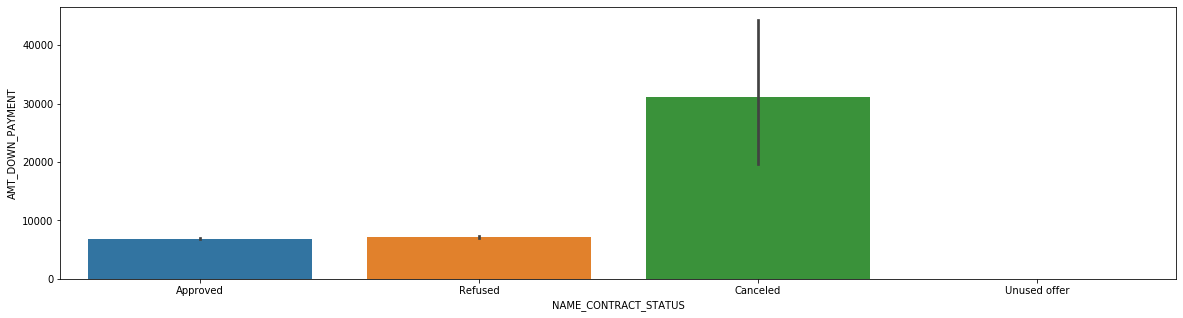

In [35]:
plt.figure(5,figsize=(20,5))
sns.barplot(y="AMT_DOWN_PAYMENT",x="NAME_CONTRACT_STATUS",data=prev_cl)
plt.show()

#### Top Rejection Reasons

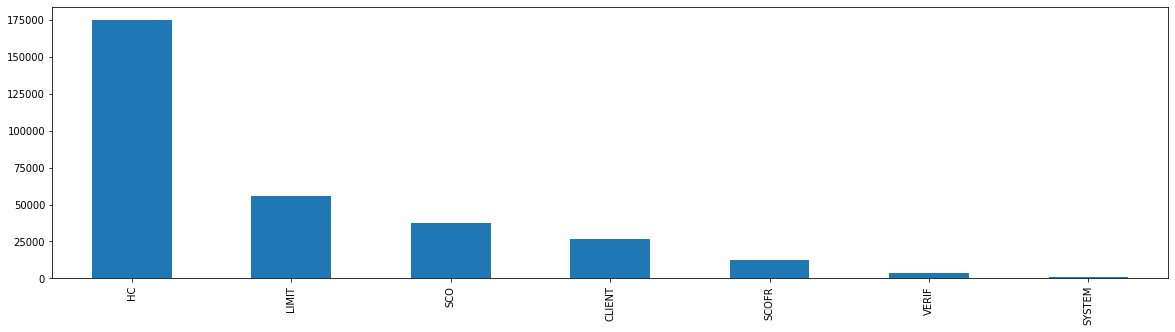

In [38]:
plt.figure(5,figsize=(20,5))
prev_cl["CODE_REJECT_REASON"].value_counts().plot.bar()
plt.show()

#### HC turns out to be the primary reason for loan application rejection 

### Client Type distribution

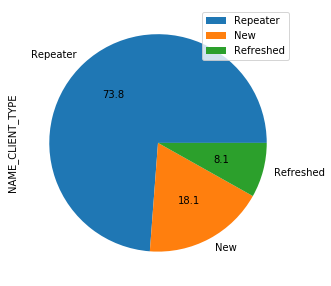

In [44]:
plt.figure(5,figsize=(5,5))
prev_cl["NAME_CLIENT_TYPE"].value_counts().plot.pie(autopct='%.1f')
plt.legend()
plt.show()

#### Majority of the loan applications came from Repeater clients

### Portfolio distribution

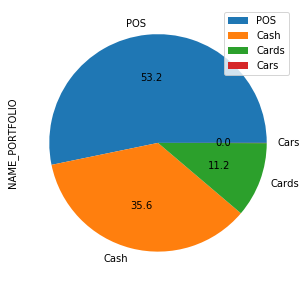

In [45]:
plt.figure(5,figsize=(5,5))
prev_cl["NAME_PORTFOLIO"].value_counts().plot.pie(autopct='%.1f')
plt.legend()
plt.show()

#### Majority of loan applications were for POS & Cash

## Analysis on combined data  
### from *Application & Previous Applications files*

#### Combining both the sources

In [52]:
app_merged = pd.merge(app_data_cl, prev_cl, how='left',on='SK_ID_CURR',suffixes=('_app','_prev'))
app_merged.shape

(1430155, 98)

In [53]:
app_merged.describe()

SK_ID_CURR       TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count 1,430,155.00 1,430,155.00  1,430,155.00      1,430,155.00   
mean    278,470.25         0.09          0.40        173,603.62   
std     102,802.10         0.28          0.72        198,330.29   
min     100,002.00         0.00          0.00         25,650.00   
25%     189,361.00         0.00          0.00        112,500.00   
50%     278,956.00         0.00          0.00        157,500.00   
75%     367,509.00         0.00          1.00        211,500.00   
max     456,255.00         1.00         19.00    117,000,000.00   

       AMT_CREDIT_app  AMT_ANNUITY_app  AMT_GOODS_PRICE_app  \
count    1,430,155.00     1,430,062.00         1,428,936.00   
mean       589,338.59        27,042.03           529,443.48   
std        387,420.36        14,040.02           355,788.24   
min         45,000.00         1,615.50            40,500.00   
25%        270,000.00        16,798.50           238,500.00   
50%        508,495.50        24,916.50           450,000.00   
75%        808,650.00        34,573.50           679,500.00   
max      4,050,000.00       258,025.50         4,050,000.00   

       REGION_POPULATION_RELATIVE   DAYS_BIRTH  DAYS_EMPLOYED  \
count                1,430,155.00 1,430,155.00   1,430,155.00   
mean                         0.02        44.20      72,559.51   
std                          0.01        11.91     143,260.09   
min                          0.00        20.00           0.00   
25%                          0.01        34.00       1,036.00   
50%                          0.02        43.00       2,395.00   
75%                          0.03        54.00       6,301.00   
max                          0.07        69.00     365,243.00   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH   FLAG_MOBIL  FLAG_EMP_PHONE  \
count       1,430,155.00     1,430,155.00 1,430,155.00    1,430,155.00   
mean            5,001.28         3,034.49         1.00            0.81   
std             3,551.63         1,507.18         0.00            0.39   
min                 0.00             0.00         0.00            0.00   
25%             1,997.00         1,783.00         1.00            1.00   
50%             4,506.00         3,330.00         1.00            1.00   
75%             7,509.00         4,319.00         1.00            1.00   
max            24,672.00         7,197.00         1.00            1.00   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE   FLAG_PHONE   FLAG_EMAIL  \
count     1,430,155.00      1,430,155.00 1,430,155.00 1,430,155.00   
mean              0.18              1.00         0.28         0.07   
std               0.39              0.03         0.45         0.26   
min               0.00              0.00         0.00         0.00   
25%               0.00              1.00         0.00         0.00   
50%               0.00              1.00         0.00         0.00   
75%               0.00              1.00         1.00         0.00   
max               1.00              1.00         1.00         1.00   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count     1,430,153.00          1,430,155.00                 1,430,155.00   
mean              2.15                  2.06                         2.04   
std               0.90                  0.50                         0.49   
min               1.00                  1.00                         1.00   
25%               2.00                  2.00                         2.00   
50%               2.00                  2.00                         2.00   
75%               3.00                  2.00                         2.00   
max              20.00                  3.00                         3.00   

       HOUR_APPR_PROCESS_START_app  REG_REGION_NOT_LIVE_REGION  \
count                 1,430,155.00                1,430,155.00   
mean                         11.99                        0.01   
std                           3.23                        0.

#### Segmented Univariate Analysis - Numerical Columns

In [54]:
#Numerical columns
numcols=list(app_merged.select_dtypes(exclude="object"))
#Categorical columns
catcols=list(app_merged.select_dtypes(include=["object","category"]))

In [77]:
print("Numerical Columns: \n "+str(numcols))
print("\n\n Categorical Columns: \n"+str(catcols))

Numerical Columns: 
 ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_app', 'AMT_ANNUITY_app', 'AMT_GOODS_PRICE_app', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START_app', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BURE

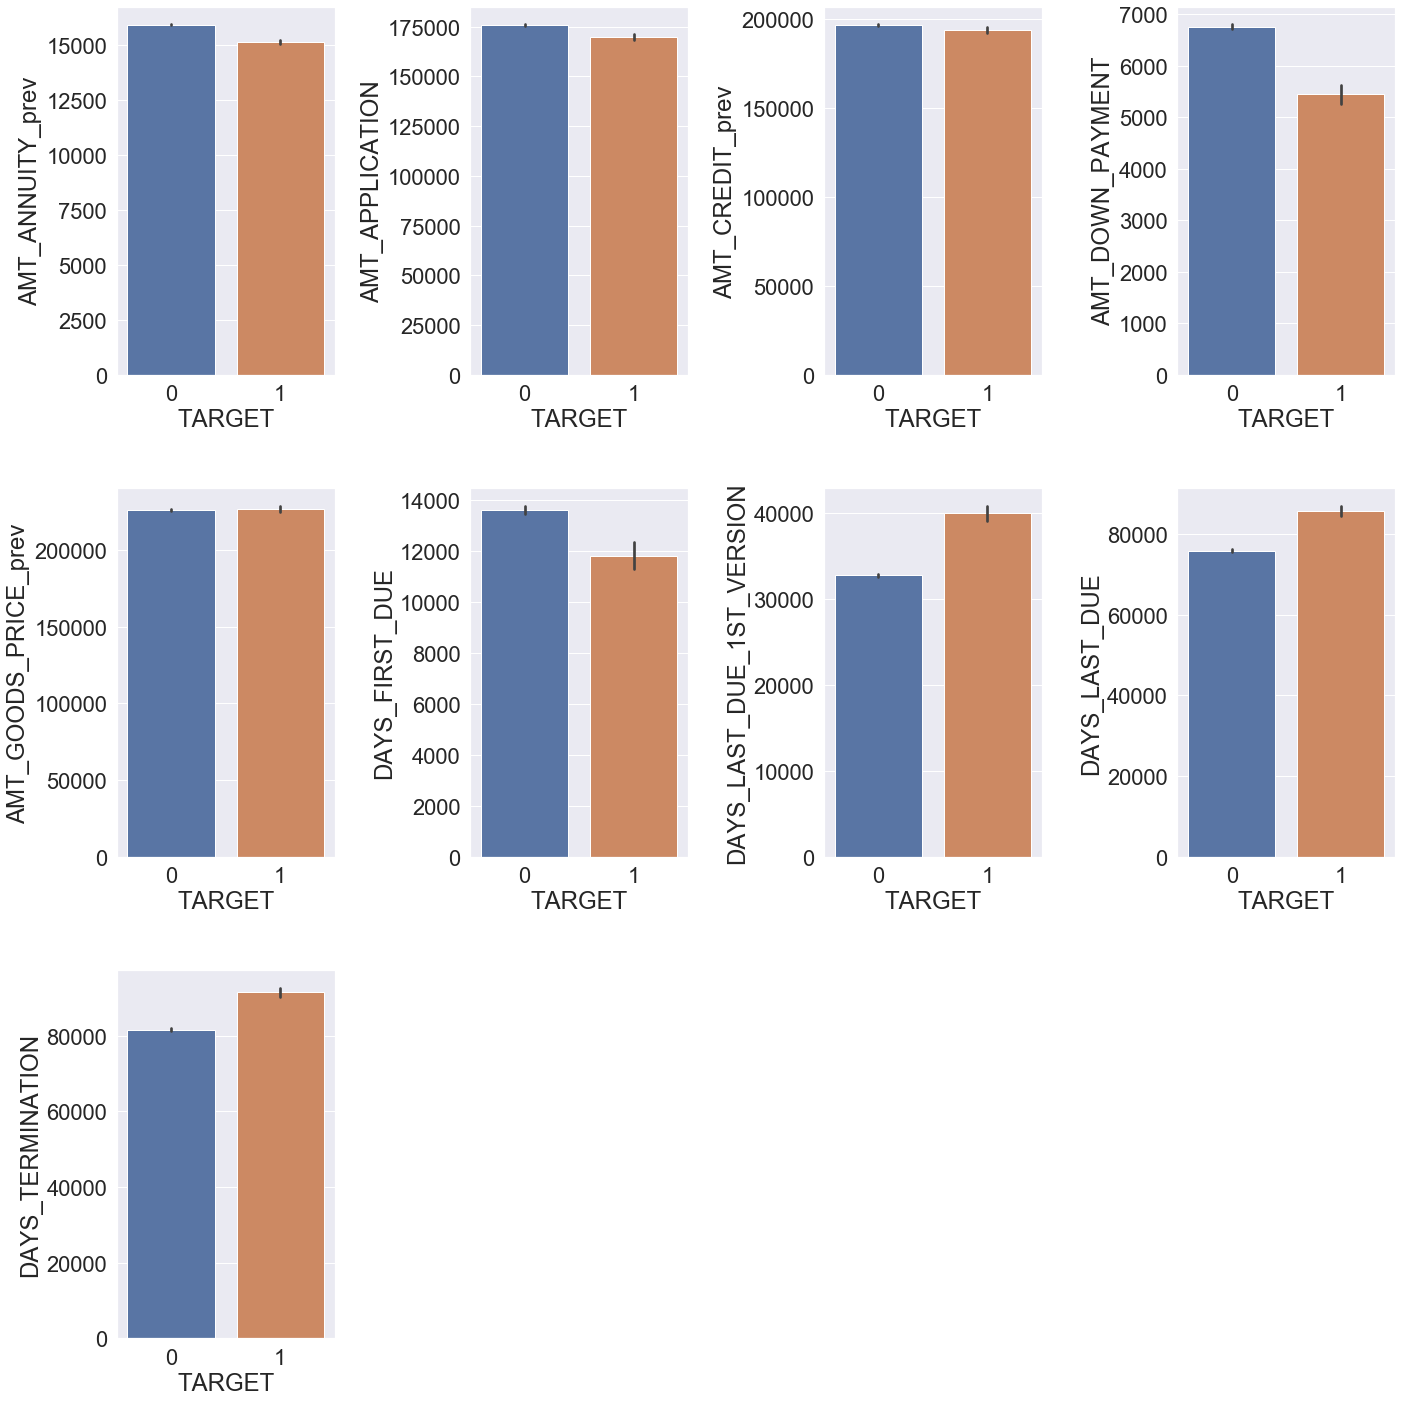

In [88]:
# Filtering only important columns
colseg=["AMT_ANNUITY_prev", "AMT_APPLICATION","AMT_CREDIT_prev", "AMT_DOWN_PAYMENT","AMT_GOODS_PRICE_prev","DAYS_FIRST_DUE", "DAYS_LAST_DUE_1ST_VERSION", "DAYS_LAST_DUE", "DAYS_TERMINATION"]
l=len(colseg)
# calculation for subplots
m=(l//4)+1
counter=1
plt.figure(figsize=(20,20))
sns.set(font_scale = 2)
for col in colseg:
    plt.subplot(m,4,counter)
    sns.barplot(y=col,x="TARGET",data=app_merged)
    counter+=1
plt.tight_layout()
plt.show()

#### Segmented Univariate Analysis - Categorical Columns

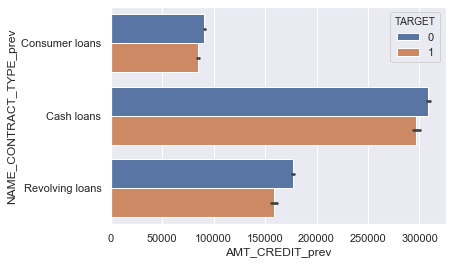

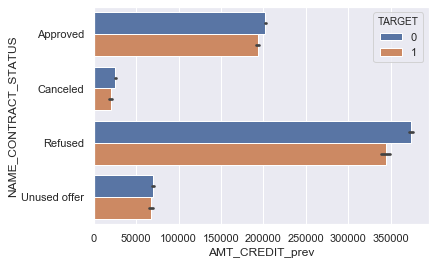

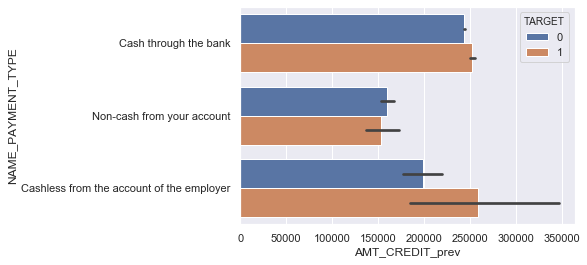

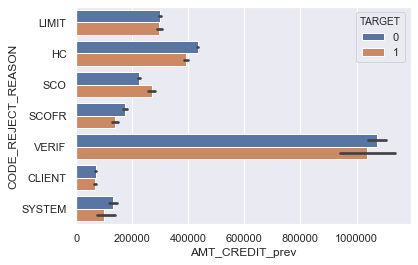

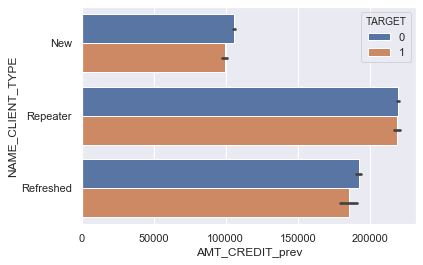

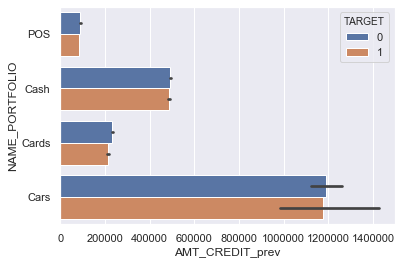

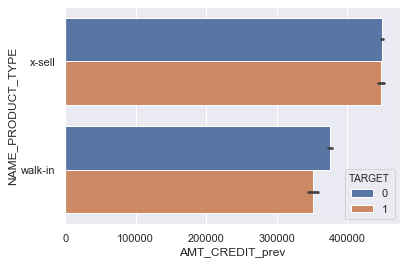

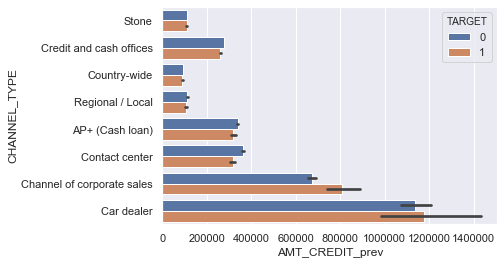

In [104]:
# Filtering only important columns
colseg=["NAME_CONTRACT_TYPE_prev", "NAME_CONTRACT_STATUS", "NAME_PAYMENT_TYPE","CODE_REJECT_REASON", "NAME_CLIENT_TYPE","NAME_PORTFOLIO", "NAME_PRODUCT_TYPE", "CHANNEL_TYPE"]
for col in colseg:
    sns.set(font_scale = 1)
    sns.barplot(y=col,x="AMT_CREDIT_prev",data=app_merged,hue='TARGET')
    plt.show()

### Multivariate Analysis on Merged data
#### for Client Type, Contract Status & Target

In [69]:
piv_merged = pd.pivot_table(app_merged, values='TARGET', index=['NAME_CLIENT_TYPE'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)
piv_merged

NAME_CONTRACT_STATUS  Approved  Canceled  Refused  Unused offer
NAME_CLIENT_TYPE                                               
New                       0.09      0.15     0.11          0.09
Refreshed                 0.07      0.08     0.12          0.07
Repeater                  0.07      0.09     0.12          0.08

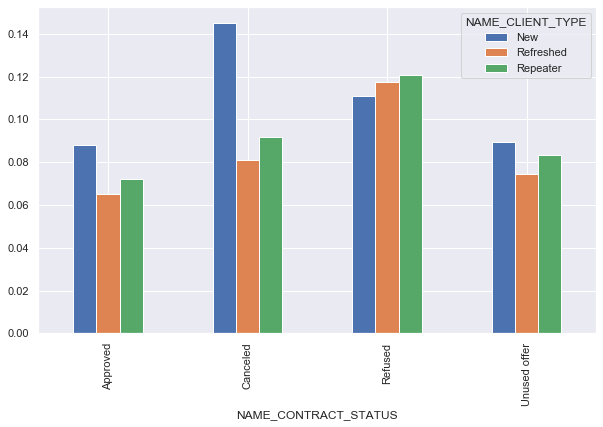

In [106]:
piv_merged.T.plot(kind='bar',figsize=(10,6))
plt.show()

### Observations:
    * Applicants with 'New' and 'Cancelled' previous applications have more Loan-Payment Difficulties in current application

### Multivariate Analysis on Merged data
#### for Contract Type, Contract Status & Target

In [107]:
app_merged.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_app', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_app', 'AMT_ANNUITY_app', 'AMT_GOODS_PRICE_app',
       'NAME_TYPE_SUITE_app', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_app', 'HOUR_APPR_PROCESS_START_app',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',


In [111]:
piv_merged1 = pd.pivot_table(app_merged, values='TARGET', index=['NAME_CONTRACT_TYPE_prev'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)
piv_merged1

NAME_CONTRACT_STATUS     Approved  Canceled  Refused  Unused offer
NAME_CONTRACT_TYPE_prev                                           
Cash loans                   0.08      0.09     0.13          0.09
Consumer loans               0.07      0.13     0.10          0.08
Revolving loans              0.09      0.11     0.13          0.00

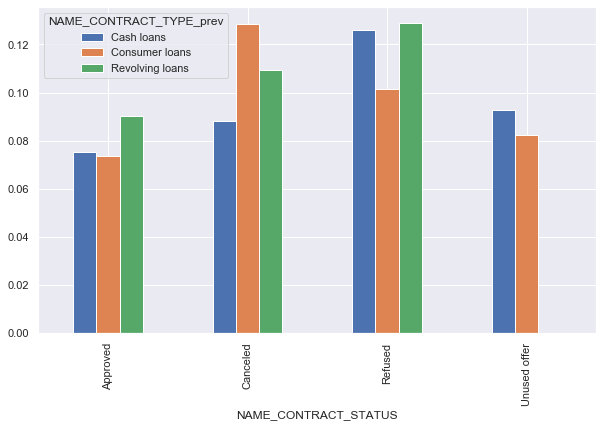

In [112]:
piv_merged1.T.plot(kind='bar',figsize=(10,6))
plt.show()

### Observations:
    * Applicants with 'Revolving loans' & 'Cash' and with 'Refused' previous applications face more Loan-Payment Difficulties in current application